# Изучение закономерностей, определяющих успешность игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

##  Задачи исследования

**Задача 1.** Открытие файла с данными и изучение общей информации

Путь к файлу: /datasets/games.csv.

**Задача 2.** Предобработка данных

Необходимо:

1. Заменить названия столбцов (приведите к нижнему регистру);
2. Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему;
3. Обработать пропуски при необходимости:
* Объяснить, почему заполнили пропуски определённым образом или почему не стали это делать;
* Описать причины, которые могли привести к пропускам;
* Обратить внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разобрать это значение и описать, как его обработать;
4. Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

**Задача 3.** Анализ данных

Необходимо:

1. Изучить сколько игр выпускалось в разные годы. Определить, важны ли данные за все периоды.
2. Изучить как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. Определить за какой характерный срок появились новые и исчезли старые платформы.
3. Выделить данные за актуальный период, позволяющие построить прогноз на 2017 год. Актуальный период определяется самостоятельно в результате исследования предыдущих вопросов. В дальнейшей работе данные за предыдущие годы не учитываются.

На основе полученных данных необходимо:

4. Определить какие платформы лидируют по продажам, растут или падают? Определить и выбрать несколько потенциально прибыльных платформ.
5. Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
6. Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
7. Соотнести выводы с продажами игр на других платформах.
8. Посмотреть на общее распределение игр по жанрам и ответить на вопросы:
* Что можно сказать о самых прибыльных жанрах? 
* Выделяются ли жанры с высокими и низкими продажами?

**Задача 4.** Составление портрета пользователя каждого региона

Необходимо составить портрет пользователя каждого региона, определив для пользователя каждого региона (NA, EU, JP, Other):
* Самые популярные платформы (топ-5) - описав различия в долях продаж.
* Самые популярные жанры (топ-5) - пояснив разницу.
* Определить, влияет ли рейтинг ESRB на продажи в отдельном регионе.

**Задача 5.** Проверка гипотез

**Гипотезы по среднему пользовательскому рейтингу игровых платформ:**

`Нулевая гипотеза:` средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

`Альтернативная гипотеза:` средние пользовательские рейтинги платформ Xbox One и PC разные;

**Гипотезы по среднему пользовательскому рейтингу игровых жанров:**

`Нулевая гипотеза:` средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые;

`Альтернативная гипотеза:` средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные;

**Примечание:** `пороговое значение alpha задается самостоятельно.`

**Задача 6.** Общий вывод по результатам исследования

## Обзор данных

**Описание данных**

`Name` — название игры

`Platform` — платформа

`Year_of_Release` — год выпуска

`Genre` — жанр игры

`NA_sales` — продажи в Северной Америке (миллионы проданных копий)

`EU_sales` — продажи в Европе (миллионы проданных копий)

`JP_sales` — продажи в Японии (миллионы проданных копий)

`Other_sales` — продажи в других странах (миллионы проданных копий)

`Critic_Score` — оценка критиков (максимум 100)

`User_Score` — оценка пользователей (максимум 10)

`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


**Изучение данных из файла**

In [1]:
# импорт библиотек
import pandas as pd
import seaborn as sns
from scipy import stats as st
from scipy.stats import levene
import numpy as np
import math as mt
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import calendar

# устанавливаем формат отображения таблицы и данных
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = 100
pd.options.mode.chained_assignment = None
sns.set_style("darkgrid")

In [2]:
# чтение файла, вывод первых 15 строк таблицы
df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

display(df.head(15))
print('\n')

# вывод информации о данных и общей информации о таблице
print('Информация о данных в таблице:')
display(df.info())
print('\n')

print('Общая информация о таблице:')
display(df.describe())
print('\n')

# подсчет дубликатов
print('Количество дубликатов:',df.duplicated().sum())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN




Информация о данных в таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None



Общая информация о таблице:


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00




Количество дубликатов: 0


Необходимо обратить внимание на написание наименований столбцов - при написании используется разный регистр - приведем названия к нижнему регистру.

In [3]:
# приведение наименований столбцов к нижнему регистру
df.columns = map(str.lower, df.columns)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Изучим каждый столбец детальней и примем решения по обработке данных

**Столбец `name`**

In [4]:
# проверка строк с пропущенными значениями
display(df[df['name'].isnull()])
print('Уникальных значений в столбце:', len(df['name'].unique()))
print('Пропусков в столбце name:', len(df[df['name'].isnull()]))
print('Процент от общего объема данных:', round(len(df[df['name'].isnull()])/len(df),5), '%')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Уникальных значений в столбце: 11560
Пропусков в столбце name: 2
Процент от общего объема данных: 0.00012 %


Обнаружены две строки с пропусками в наименовании и жанре игр - в одних из ключевых параметрах. Восстановить данные не представляется возможным.

**Столбец `platform`**

In [5]:
print('Уникальных значений в столбце:', len(df['platform'].unique()),'\n')
print(df['platform'].unique())

Уникальных значений в столбце: 31 

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


**Столбец `year_of_release`**

In [6]:
# проверка строк с пропущенными значениями
display(df[df['year_of_release'].isnull()].head())
print('Уникальных значений в столбце:', len(df['year_of_release'].unique()),'\n')
print(df['year_of_release'].unique())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.00,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.00,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Уникальных значений в столбце: 38 

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]


При изучении пропусков по данному столбцу было установлено, что в некоторых строках можно заполнить пропуски годом, извлеченным из наименования игр с учетом "-1" - чаще всего, игры выходят с разницей в 1 год от года, указанного в наименовании. Например, если в названии игры заявлен 2004 год, то игра вышла в 2003 году. Однако могут быть и исключения. 

Проверим объем данных который можем получить таким методом и примем решение о целесообразности описанных действий.

In [7]:
# создание таблицы с пропусками в столбце 'year_of_release'
df_non_yaer = df[df['year_of_release'].isnull()]

# извлечение года из столбца 'name'
df_non_yaer['year_of_release'] = df_non_yaer.name.str.extract(r'(\d{4})', expand=False)
print('Пропусков в столбце year_of_release:', len(df_non_yaer))
print('Процент от общего объема данных:', round((len(df_non_yaer)/len(df))*100, 1), '%')
print('\n')
print('Возможно заполнить пропусков:', df_non_yaer['year_of_release'].value_counts().sum())
print('Процент от общего объема данных:', round(((df_non_yaer['year_of_release'].value_counts().sum())/len(df))*100, 1), '%')

Пропусков в столбце year_of_release: 269
Процент от общего объема данных: 1.6 %


Возможно заполнить пропусков: 17
Процент от общего объема данных: 0.1 %


**Столбец `genre`**

Изучая пропуски по стобцу `name` было установлено, что в соответствующих строках имеются пропуски и по столбцу `genre`. Заполнить пропуски не представляется возможным.

Изучим остальные значения в данном столбце.

In [8]:
print('Уникальных значений в столбце:', len(df['genre'].unique()),'\n')
print(df['genre'].unique())

Уникальных значений в столбце: 13 

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]


**Столбцы `na_sales`, `eu_sales`, `jp_sales`, `other_sales`**

В данных столбцах хранится информация о количестве проданных копий игр в разных регионах. / Визуализируем данные по стобцам `NA_sales`, `EU_sales`, `JP_sales`, `Other_sales` для определения наличия выбросов в данных.

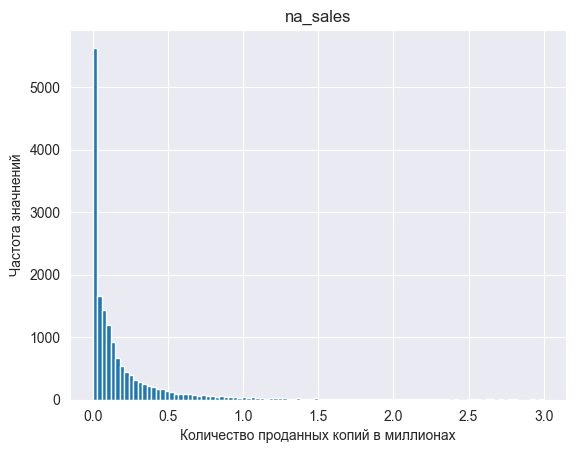

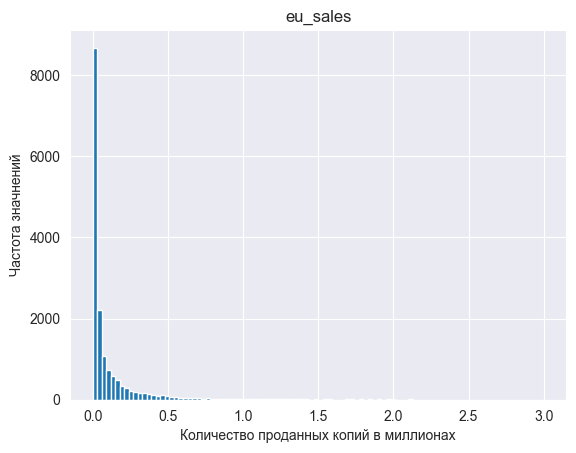

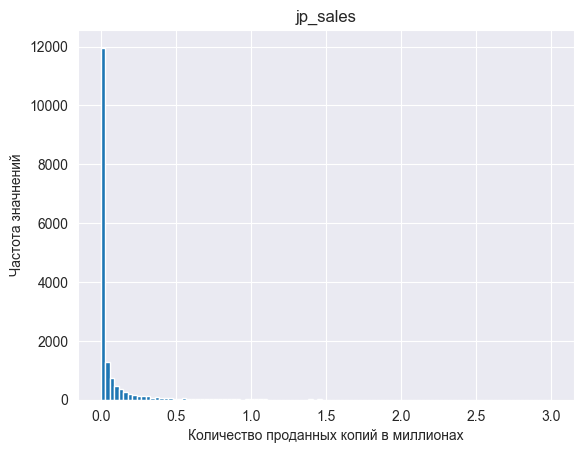

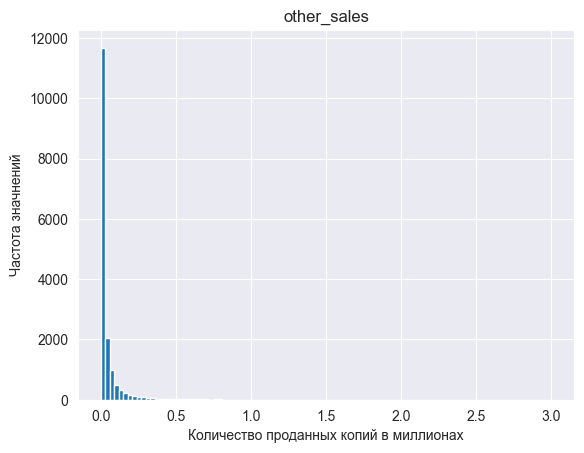

In [9]:
def hist(region):
    
    if region==['na_sales']:
        plt.hist(df[region], bins=100, range=(0,5))
    else:
        plt.hist(df[region], bins=100, range=(0,3))
        
    plt.title(region)
    plt.xlabel('Количество проданных копий в миллионах')
    plt.ylabel('Частота значнений')
    plt.show()

hist('na_sales')
hist('eu_sales')
hist('jp_sales')
hist('other_sales')

На графиках распределений заметны мощные пики в районе нулевых значений в каждом из регионов - вероятней всего это выбросы от которых можно избавиться. Создадим фильтр с помощью метода `query` для проверки на наличие в датафрейме строк с нулевыми продажами по всем регионам.

In [10]:
game_min_sales = df.query('na_sales == 0 and eu_sales == 0 and jp_sales==0 and other_sales == 0')
game_min_sales

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16676,G1 Jockey 4 2008,PS3,"2,008.00",Sports,0.00,0.00,0.00,0.00,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,"2,008.00",Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN


Строк соответствующих условию всего 2. Это значит, что в датафрейме имеется большое количество значений приблеженных к нулю, но не равных ему.

Поскольку в таблице представлены данные с 1980 года - начала глобального развития игровой индустрии, предположим, что наличие значений приблеженных к нулю является нормальным явлением и не требует обработки.

**Столбец `critic_score`**

Познакомимся со значениями в данном столбце и визуализируем данные на графике.

In [11]:
print('Уникальных значений в столбце:', len(df['critic_score'].unique()))
print('Пропусков в столбце critic_score:', len(df[df['critic_score'].isnull()]))
print('Процент от общего объема данных:', round((len(df[df['critic_score'].isnull()])/len(df))*100, 1), '%')
print('\n')
print(df['critic_score'].unique())

Уникальных значений в столбце: 83
Пропусков в столбце critic_score: 8578
Процент от общего объема данных: 51.3 %


[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]


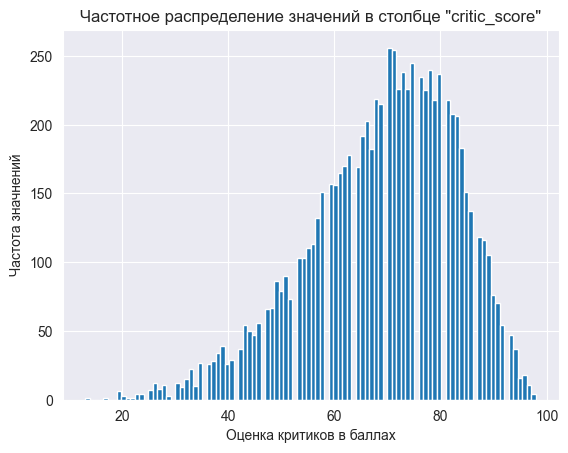

In [12]:
plt.hist(df['critic_score'], bins=100)
plt.title('Частотное распределение значений в столбце "critic_score"')
plt.xlabel('Оценка критиков в баллах')
plt.ylabel('Частота значнений')
plt.show()

Не смотря на формат `float` данные представлены числами с нулевой дробной частью - можно привести к формату `int` после заполнения пропусков.

**Столбец `user_score`**

Посмотрим на значения в столбце.

In [13]:
print('Уникальных значений в столбце:', len(df['critic_score'].unique()),'\n')
print(df['user_score'].unique())

Уникальных значений в столбце: 83 

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


В данном столбце имеется строковое значение `tbd`, что расшифровывается как `To Be Determined` - будет опередлен позднее. Можно предположить, что значение `tbd` будем наблюдать в строках с предрелизными или недавно вышедшими играми.

Проверим наше предположение - посмотрим на строки со значением `tbd`. 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,"2,010.00",Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,"2,005.00",Misc,2.08,1.35,0.00,0.54,61.00,tbd,E10+
520,Zumba Fitness 2,Wii,"2,011.00",Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,"2,010.00",Misc,1.65,0.57,0.00,0.20,71.00,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.00,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,"2,001.00",Action,0.01,0.00,0.00,0.00,67.00,tbd,E
16697,Bust-A-Move 3000,GC,"2,003.00",Puzzle,0.01,0.00,0.00,0.00,53.00,tbd,E
16698,Mega Brain Boost,DS,"2,008.00",Puzzle,0.01,0.00,0.00,0.00,48.00,tbd,E
16704,Plushees,DS,"2,008.00",Simulation,0.01,0.00,0.00,0.00,NaN,tbd,E


Процент от общего объема данных: 14.5 %


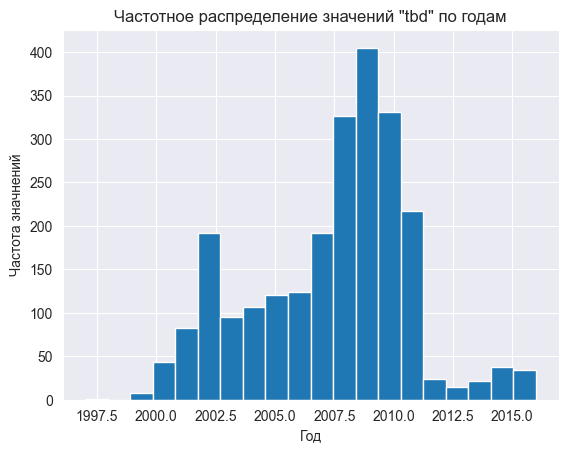

In [14]:
tbd_score = df.query('user_score == "tbd"')
display(tbd_score)
print('Процент от общего объема данных:', round(len(tbd_score)/len(df)*100, 2), '%')

plt.hist(tbd_score['year_of_release'], bins=20)
plt.title('Частотное распределение значений "tbd" по годам')
plt.xlabel('Год')
plt.ylabel('Частота значнений')
plt.show()

Значение `tbd` в столбце `user_score` встречается 2424 раза, что составляет 14.5 % от общего объема данных - удалять нельзя, т.к. потяряем существенную часть данных.

Наше предположение о том, что данное значение будет соответствовать недавно вышедшим играм не подтвердилось. Пиковое значение на графике соответсвует ~2009 году.

Поскольку данные брались из открытых источников информации, возможно, что для получения данных использовался источник с устаревшей БД.

В рамках данного исследования значение `tbd` содержательно не повлияет на результ. Однако данный столбец представляет интерес - избавимся от этого значения, заменив его на ноль. Это позволит использовать данные в полном объеме.

**Столбец `rating`**

Изучим содержание столбца

In [15]:
print('Уникальных значений в столбце:', len(df['rating'].unique()),'\n')
print(df['rating'].unique())

Уникальных значений в столбце: 9 

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [16]:
# подсчет пропусков в столбце 'rating'
df_non_rating = df[df['rating'].isnull()]
print('Пропусков в столбце rating:', len(df_non_rating))
print('Процент от общего объема данных:', round((len(df_non_rating)/len(df))*100, 1), '%')

Пропусков в столбце rating: 6766
Процент от общего объема данных: 40.5 %


**Результаты обзора данных:**

По итогам обзора данных были сделаны некоторые наблюдения и приняты решения по дальнейшей обработке данных:

|Столбец            |Наблюдения                                |Текущие данные  |Объем проблемных данных|Решение          |
|:------------------|:----------------------------------------:|:--------------:|:---------------------:|:---------------:|
|**name**           |разный регистр, два пропуска              |Aa, Nan         |0.00012 %              |привести к нижнему регистру, строки с пропусками удалить|
|**year_of_release**|пропуски в данных, некорректный тип данных|float64, Nan    |1.6 %                  |заполнить пропуски не удастся - строки с пропусками можно удалить, оставшиеся данные привести к типу `int`|
|**genre**          |разный регистр, два пропуска              |Aa, Nan         |0.00012 % = `name`     |привести к нижнему регистру, строки с пропусками удалить|
|**`REGION`_sales**|продажи равные нулю|0    |0.00012 %           |удалить строки с продажами равными нулю по всем регионам|_
|**critic_score**   |пропуски в данных, некорректный тип данных|Nan,float64              |51.3 %             |заполнить пропуски значением `-1`, привести данные к типу `int`|
|**user_score**     |пропуски в данных, некорректный тип данных      |object, Nan, `tbd`|40.1 %             |пропуски и `tbd` заменить значением `-1`, данные привести к типу `float`|
|**rating**         |пропуски в данных                            |Nan              |40.5 %              |заполнить пропуски значением `non_rating`|

Для итогового расчета объема данных, подлежащего удалению сформируем таблицу `remove_str` и произведем расчеты.

In [17]:
remove_name = df.query('name.isna()')
remove_year = df.query('year_of_release.isna()')

remove_str = (pd.concat([remove_name, remove_year,game_min_sales], 
                     ignore_index=True)).drop_duplicates().reset_index(drop=True)
print('Количество строк для удаления:', len(remove_str))
print('Процент от общего объема данных:', round((len(remove_str)/len(df))*100, 1), '%')

Количество строк для удаления: 273
Процент от общего объема данных: 1.6 %


## Предобработка данных

Обработаем данные согласно принятым решениям на этапе обзора данных.

**Удаление строк**

In [18]:
# удаление строк с продажами менее 0.02
df = df.query('na_sales!=0 or eu_sales!=0 or jp_sales!=0 or other_sales!=0')

# удаление строк с пропусками в столбцах 'name' и 'year_of_release'
df.dropna(subset=['name', 'year_of_release'], inplace=True)
df = df.reset_index(drop=True)

**Замена значений**

In [19]:
# замена значений 'tbd' в столбце 'user_score' на значение NaN
df['user_score'] = pd.to_numeric(df['user_score'], errors = 'coerce')

**Заполнение пропусков**

In [20]:
# заполненение пропусков в столбцах 'critic_score', 'user_score'
df[['critic_score', 'user_score']] = df[['critic_score', 'user_score']].fillna(value=-1)

# заполненение пропусков в столбце 'rating'
df['rating'] = df['rating'].fillna(value='non_rating')

**Изменение типа данных**

In [21]:
#  приведение типов данных в столбцах 'year_of_release', 'critic_score' к типу int
df[['critic_score','year_of_release']] = df[['critic_score','year_of_release']].astype(int)

**Форматирование регистра текстовых значений**

In [22]:
#  приведение значений типа 'object' к нижнему регистру
df[['name','genre']] = df[['name','genre']].apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)

**Добавление данных в таблицу**

Добавим в таблицу дополнительный столбец `total_sales` с суммарным количеством проданных копий.

In [23]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df = df.reindex(columns=['name', 'platform', 'year_of_release', 
                         'genre', 'na_sales', 'eu_sales',
                         'jp_sales', 'other_sales', 'total_sales', 
                         'critic_score', 'user_score', 'rating',])

**Итоговая таблица**

Выполним проверку. Выведем итоговую таблицу, информацию о данных, общую информацию об итоговой таблице, посчитаем дубликаты после обработки данных:

In [24]:
# вывод первых 15 строк таблицы
display(df.head(15))
print('\n')

# вывод информации о данных и общей информации о таблице
print('Информация о данных в таблице:')
display(df.info())
print('\n')

print('Общая информация о таблице:')
display(df.describe())
print('\n')

# подсчет дубликатов
print('Количество дубликатов:',df.duplicated().sum())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,wii sports,Wii,2006,sports,41.36,28.96,3.77,8.45,82.54,76,8.00,E
1,super mario bros.,NES,1985,platform,29.08,3.58,6.81,0.77,40.24,-1,-1.00,non_rating
2,mario kart wii,Wii,2008,racing,15.68,12.76,3.79,3.29,35.52,82,8.30,E
3,wii sports resort,Wii,2009,sports,15.61,10.93,3.28,2.95,32.77,80,8.00,E
4,pokemon red/pokemon blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,31.38,-1,-1.00,non_rating
5,tetris,GB,1989,puzzle,23.20,2.26,4.22,0.58,30.26,-1,-1.00,non_rating
6,new super mario bros.,DS,2006,platform,11.28,9.14,6.50,2.88,29.80,89,8.50,E
7,wii play,Wii,2006,misc,13.96,9.18,2.93,2.84,28.91,58,6.60,E
8,new super mario bros. wii,Wii,2009,platform,14.44,6.94,4.70,2.24,28.32,87,8.40,E
9,duck hunt,NES,1984,shooter,26.93,0.63,0.28,0.47,28.31,-1,-1.00,non_rating




Информация о данных в таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16442 entries, 0 to 16441
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16442 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  int32  
 3   genre            16442 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16442 non-null  float64
 8   total_sales      16442 non-null  float64
 9   critic_score     16442 non-null  int32  
 10  user_score       16442 non-null  float64
 11  rating           16442 non-null  object 
dtypes: float64(6), int32(2), object(4)
memory usage: 1.4+ MB


None



Общая информация о таблице:


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score
count,"16,442.00","16,442.00","16,442.00","16,442.00","16,442.00","16,442.00","16,442.00","16,442.00"
mean,"2,006.49",0.26,0.15,0.08,0.05,0.54,32.98,2.69
std,5.88,0.82,0.51,0.31,0.19,1.56,36.30,4.17
min,"1,980.00",0.00,0.00,0.00,0.00,0.01,-1.00,-1.00
25%,"2,003.00",0.00,0.00,0.00,0.00,0.06,-1.00,-1.00
50%,"2,007.00",0.08,0.02,0.00,0.01,0.17,-1.00,-1.00
75%,"2,010.00",0.24,0.11,0.04,0.03,0.47,70.00,7.30
max,"2,016.00",41.36,28.96,10.22,10.57,82.54,98.00,9.70




Количество дубликатов: 0


**Результаты предобработки данных:**

Была подготовлена таблица для дальнейшей корректной работы

## Исследовательский анализ данных

На данном этапе исследования:

* Изучим сколько игр выпускалось в разные годы. Определим, важны ли данные за все периоды. 
* Изучим динамику продаж контента на платформах. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Определим за какой характерный срок появились новые и исчезли старые платформы.
* Выделим данные за актуальный период, позволяющие построить прогноз на 2017 год. 

**Примечание:** `Актуальный период определим исходя из полученных результатов. В дальнейшей работе данные за неактуальный период учитываться не будут.`

* Определим лидеров по продажам контента среди платформ. Изучим особенности продаж на выделенных платформах. Выберем несколько потенциально прибыльных платформ.
* Для выбранных потенциально прибыльных платформ построим график «ящик с усами» по глобальным продажам игр; изучим влияние на продажи внутри платформы отзывов пользователей и критиков - построим диаграммы рассеяния и посчитаем корреляцию между отзывами и продажами. 
* Соотнесем выводы с продажами игр на других платформах. 
* Посмотрим на общее распределение игр по жанрам и ответим на вопросы: Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**Изучение объемов релизов игр по годам**

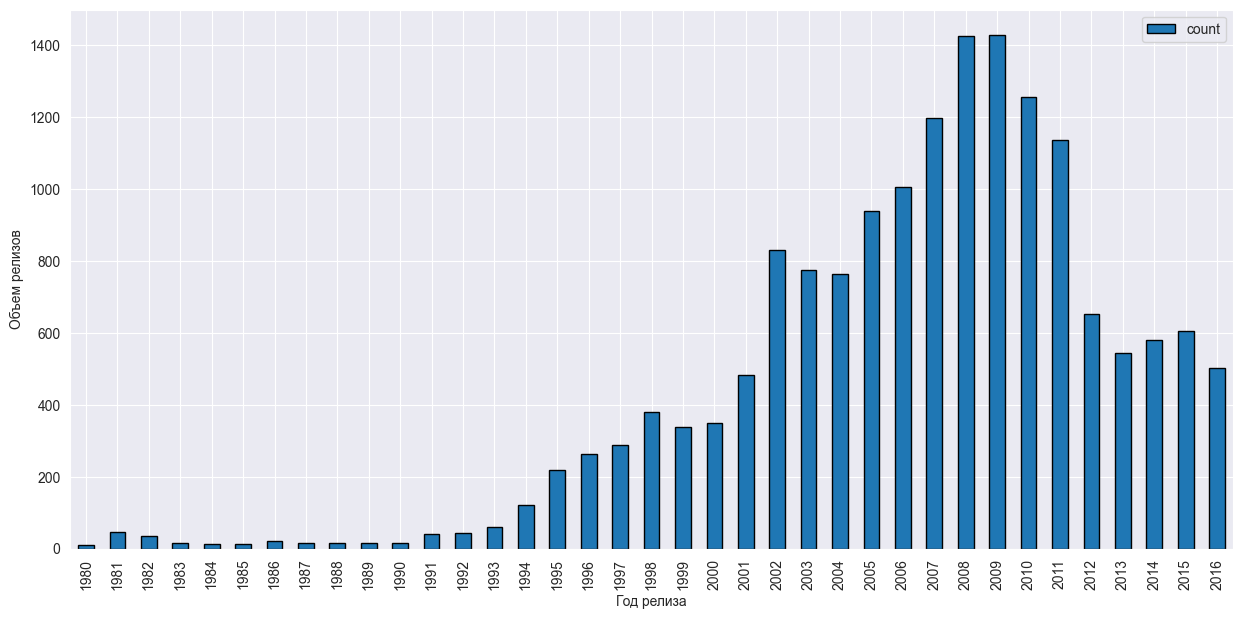

In [26]:
# построение диаграммы по объему игровых релизов в зависимости от года
vol_of_releases = df.pivot_table(index='year_of_release', 
                                 values='name', 
                                 aggfunc='count').rename(columns={'name':'count'})

vol_of_releases.plot(kind='bar', ec='black', grid=True, figsize=(15, 7))
plt.xlabel('Год релиза')
plt.ylabel('Объем релизов')
plt.show()

По графику отчетливо прослеживается положительная динамика по количеству выпускаемых игр начиная с 1994 года. До этого момента наблюдается плато - количество релизов не превышало 100 на всех платформах в совокупности. Это являние объясняется началом развития игровой индустрии как таковой.

Своего пика игровая индустрия по объему релизов достигает в 2008-2009 годах - к тому моменту на рынке игр закрепились несколько крупнейших платформодержателей в лице таких команий как Microsoft (PC, Xbox(Gen)) и Sony (PS(Gen), PSP). В этот период времени большая часть разработчиков была сосредоточена на производстве однопользовательских «AAA-игр» - наиболее высокобюджетных компьютерных игр, рассчитанных на массовую аудиторию и требующих огромных затрат как на саму разработку игры, так и на её маркетинг, в первую очередь, рекламную кампанию ко времени выхода, что вело к повышению конкуренции на рынке игр. Как результат - появлялись новые игровые жанры, а также увеличивался общий объем релизов.

Однако интересен период с начала 2009 года по 2013 год - в этот период общий объем релизов снижается до показателей 2001 года. Безусловно это не связано с упадком игровой индустрии или, например, глобальными экономическими процессами. Ответ менее очевиден, с развитием телекоммуникационной сети интернет на рынке появляется новый игрок - ММО (Массовая многопользовательская онлайн-игра) - компьютерная онлайн-игра, в которой большое количество игроков взаимодействует друг с другом в «постоянном» игровом мире, расположенном на удалённом сервере. Преимущественно ММО-игры распространялись в цифровом формате по схеме Free-to-play, что давало доступ тысячам игроков доступ в виртуалный мир без необходимости покупать физические копии игр.

В итоге, разработка ММО проектов стала экономически и ресурсозатратно более выгодным предприятем для многих разработчиков, а гибкие системы монетезации внутриигровых покупок позволяли обеспечивать существенный доход в случае востребованности проекта.

**Изучение динамики продаж игр на платформах**

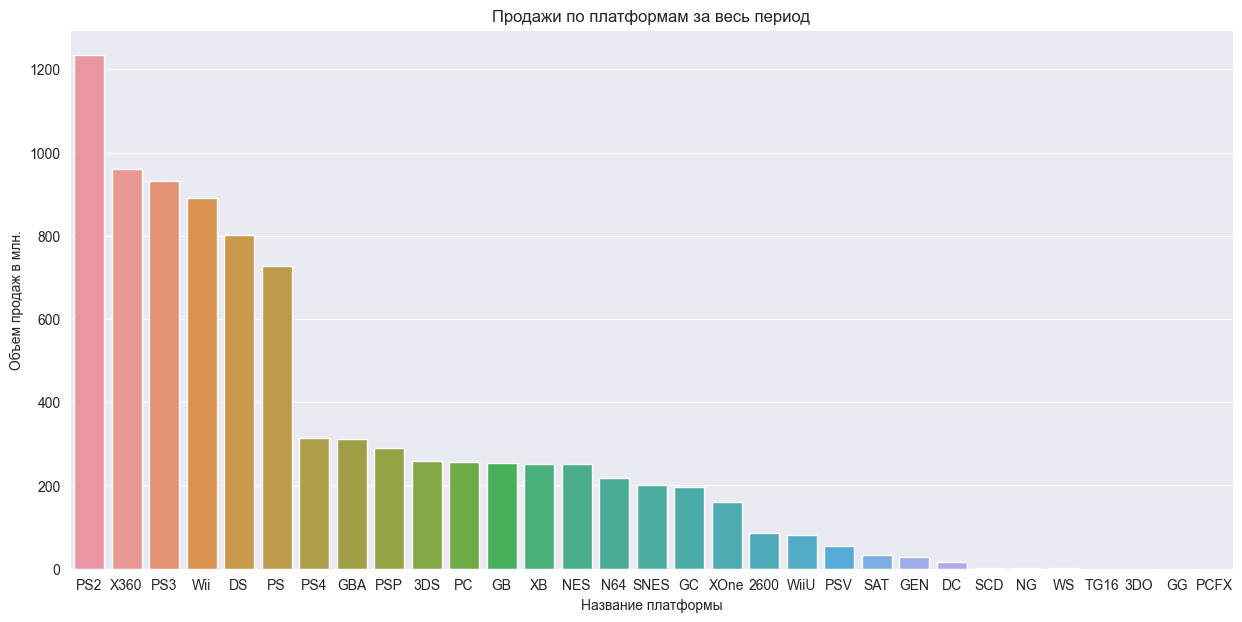

In [27]:
# формирование сводной таблицы по суммарным продажам игр на платформах за весь изучаемый период
platform_on_sales = (df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
                     .sort_values(by='total_sales',ascending=False))

# построение графика суммарных продаж на платформах
plt.figure(figsize=(15,7))
sns.barplot(x=platform_on_sales.index,y=platform_on_sales['total_sales'])
plt.title('Продажи по платформам за весь период')
plt.xlabel('Название платформы')
plt.ylabel('Объем продаж в млн.')
plt.show()

Исходя из графика, отчетливо выделяются шесть платформ, отличающихся по максимальным продажам от остальных. Посмотрим на них:

In [28]:
platform_on_sales.head(6)

,total_sales
platform,
PS2,"1,233.56"
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58


Изучим распределение продаж по годам на этих платформах:

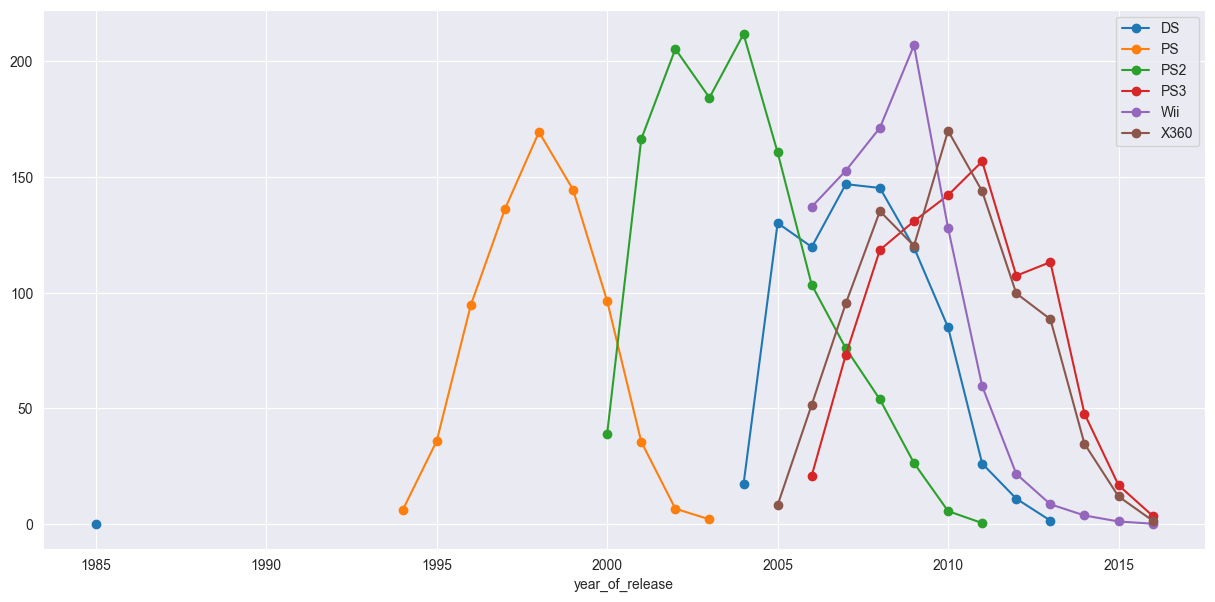

In [29]:
top_platform_on_sales = df.query('platform == ["PS2", "X360", "PS3", "Wii", "DS", "PS"]')
release_on_top_platform = top_platform_on_sales.pivot_table(index='year_of_release', 
                                     columns='platform', 
                                     values='total_sales', 
                                     aggfunc='sum')

release_on_top_platform.plot(style='o-', grid=True, figsize=(15, 7))
plt.legend()
plt.show()

Согласно графику, продажи на платформах в среднем продолжаются на протяжении 10 лет. Определим этот период как "жизненный цикл платформы".

Обратим внимание на три поколения консолей от Sony - ps, ps2, ps3, представленые на графике. Инетресно то, что появление новой модели происходит на второй год после начала падения продаж контента на старой консоли и совпадает с шестилетним возрастом последней.

Проверим, является ли данное наблюдение актуальным для следующего поколения платформы от Sony - ps4, а также, проверим возможность экстраполяции нашего предположения на другие платформы. Для проверки возьмем серии игровых платформ Xbox - `xb, x360, xone` и Nintendo - `nes, snes, n64, gc, wii, wiiu`.

<font color='hotpink'><b>PlayStation</b></font><br>

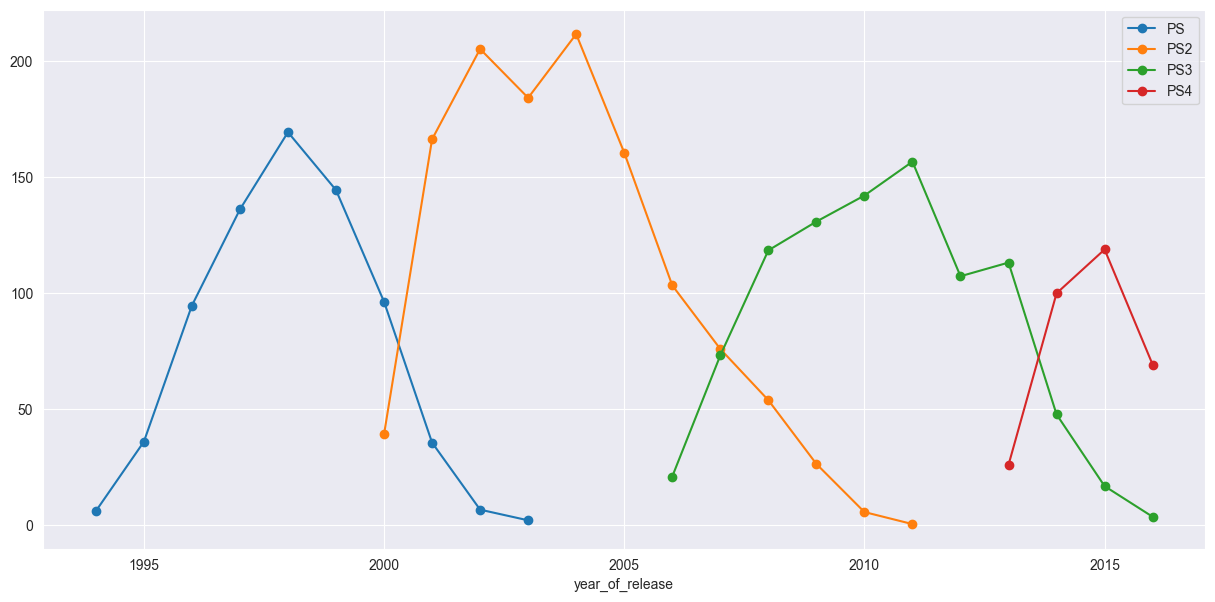

In [30]:
ps_platform = df.query('platform == ["PS", "PS2", "PS3", "PS4"]')
ps_platform_pivot = ps_platform.pivot_table(index='year_of_release', 
                                     columns='platform', 
                                     values='total_sales', 
                                     aggfunc='sum')

ps_platform_pivot.plot(style='o-', grid=True, figsize=(15, 7))
plt.legend()
plt.show()

<font color='hotpink'><b>Xbox</b></font><br>

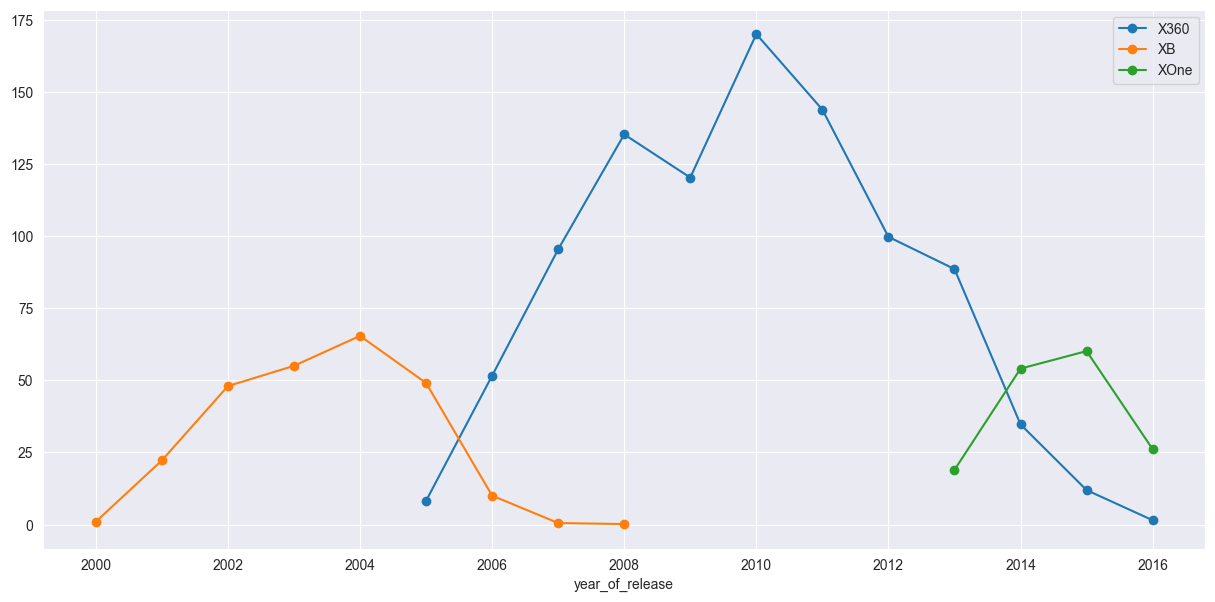

In [31]:
xb_platform = df.query('platform == ["XB", "X360", "XOne"]')
xb_platform_pivot = xb_platform.pivot_table(index='year_of_release', 
                                     columns='platform', 
                                     values='total_sales', 
                                     aggfunc='sum')

xb_platform_pivot.plot(style='o-', grid=True, figsize=(15, 7))
plt.legend()
plt.show()

<font color='hotpink'><b>Nintendo</b></font><br>

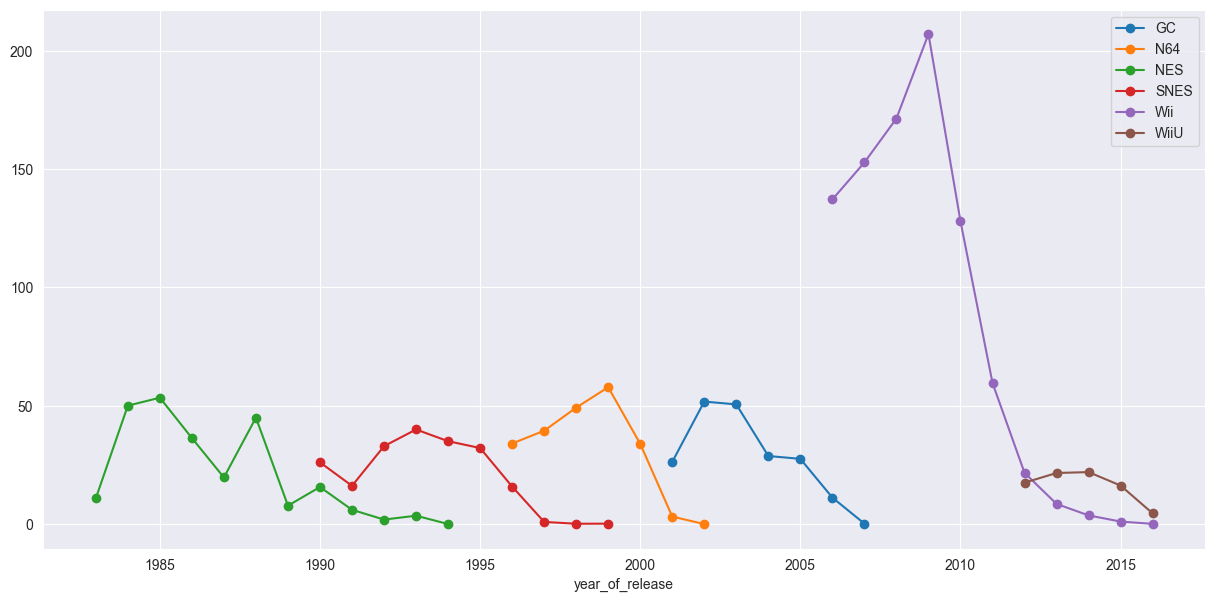

In [32]:
ps_platform = df.query('platform == ["NES", "SNES", "N64", "GC", "Wii", "WiiU"]')
ps_platform_pivot = ps_platform.pivot_table(index='year_of_release', 
                                     columns='platform', 
                                     values='total_sales', 
                                     aggfunc='sum')

ps_platform_pivot.plot(style='o-', grid=True, figsize=(15, 7))
plt.legend()
plt.show()

Если говорить о предположении в отношении политики компании Sony по выпуску новых поколений устройств, то наше предположение подтвердилось на половину - контент для ps4, по всей видимости, как и сама платформа действительно начали продаваться на второй год с момента падения продаж контента на ps3, однако появление ps4 совпало не с шестым годом продаж на ps3, а с седьмым.

Однако применить выделенную закономерность к другим платформам невозможно - жизненный циклы платформ, а также динамика продаж слишком сильно отличаются у серий платформ. 

Тем не менее, для всех серий платформ отмечается общий тренд - в среднем смена поколений происходит через один-два года после достижения платформы середины своего "жизненного цикла".

Если применять этот вывод к топу платформ по продажам контента, то этот период составит примерно 6-7 лет.

Таким образом, актуальными данными можем считать выборку данных с периодом продаж с момента релиза не более 5 лет от текущей даты. Резюмируя сделанные выводы, определим как "актуальный период" период в 5 лет от текущей даты, т.е. с 2012 года.

**Анализ данных за актуальный период**

Сформируем новый датафрейм с учетом года релиза игр. Изучим объемы продаж по платформам, вошедшим в выборку.

Text(0, 0.5, 'Объем продаж в млн.')

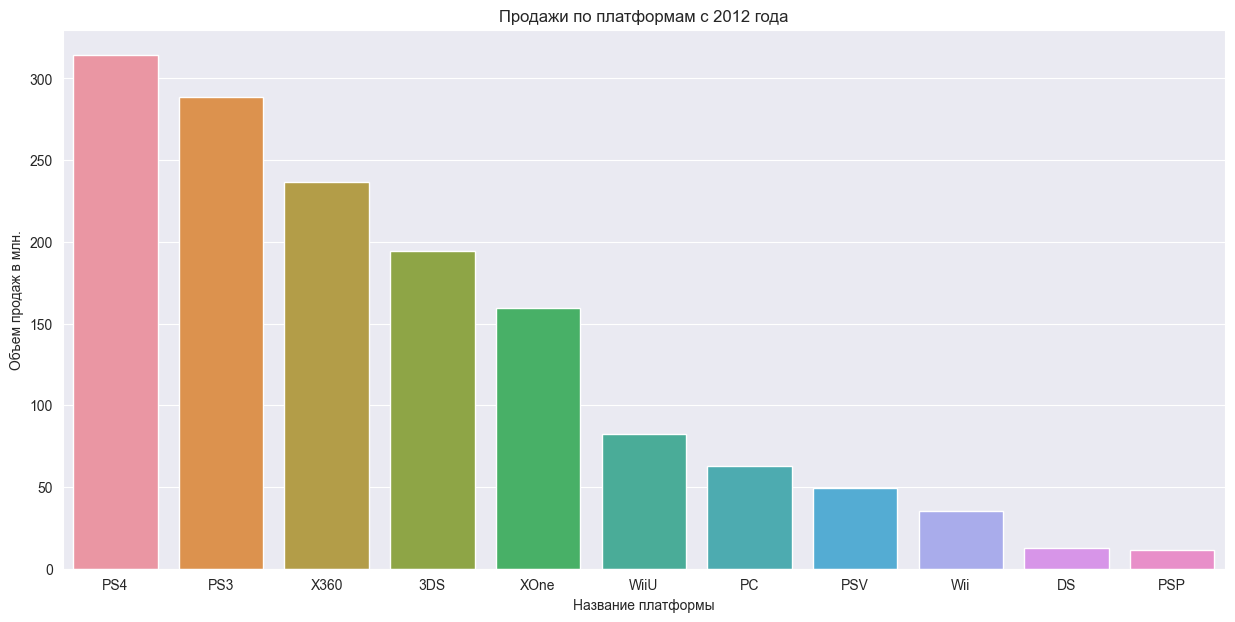

In [33]:
# формирование выборки данных начиная с 2012 года
df_actual_year = df.query('year_of_release >= 2012')

# формирование сводной таблицы по суммарным продажам игр на платформах за весь изучаемый период
relevant_platform_on_sales = df_actual_year.pivot_table(index='platform',
                                   values='total_sales',
                                   aggfunc='sum').sort_values(by='total_sales',ascending=False)

# построение графика суммарных продаж на платформах
plt.figure(figsize=(15,7))
sns.barplot(x=relevant_platform_on_sales.index,y=relevant_platform_on_sales['total_sales'])
plt.title('Продажи по платформам с 2012 года')
plt.xlabel('Название платформы')
plt.ylabel('Объем продаж в млн.')

Исходя из полученного графика, выделим платформы с суммарными продажами контента от 100 млн.

In [34]:
relevant_platform_on_sales[relevant_platform_on_sales['total_sales']>=100]

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32


Для выделенных платформ определим характеристики продаж - рост или падение.

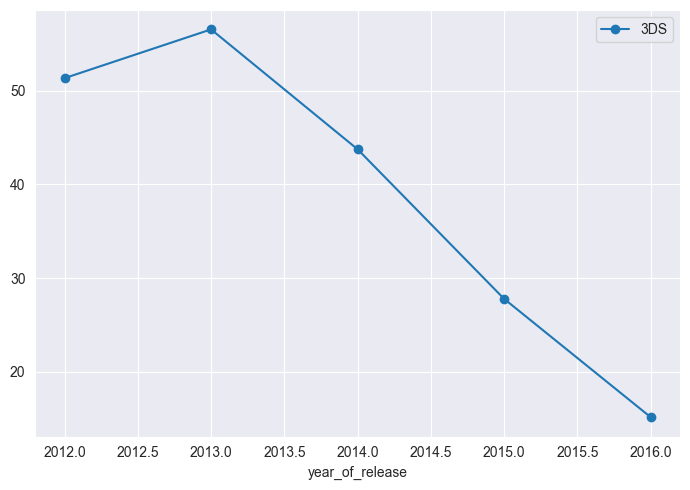

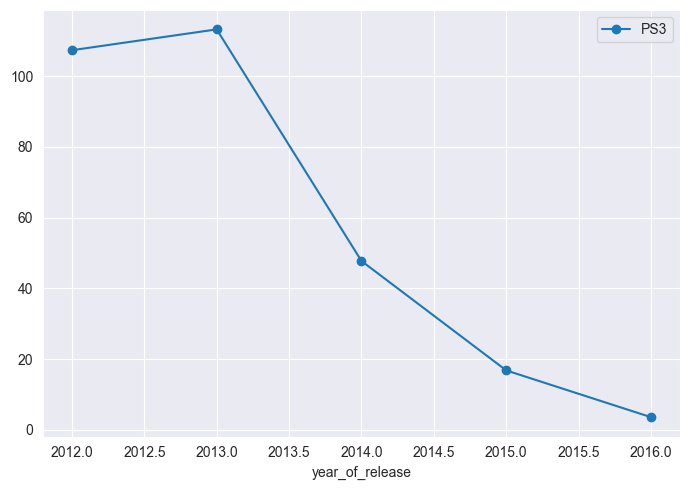

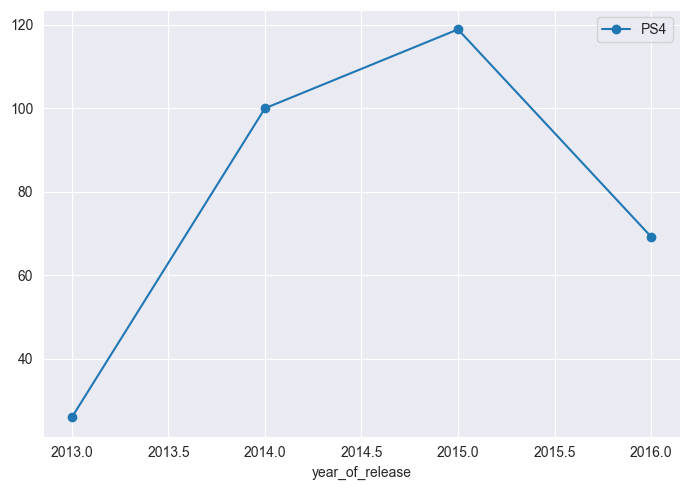

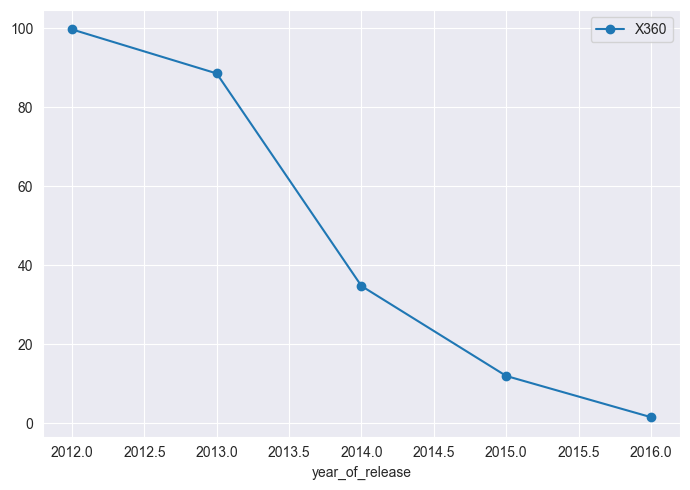

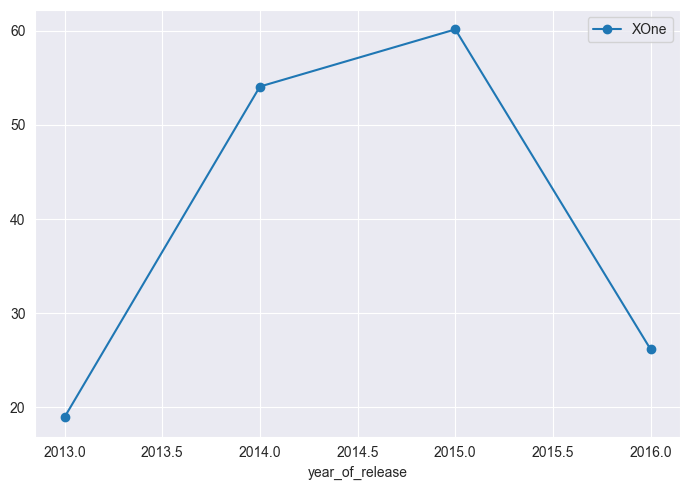

In [35]:
rel_platform = df_actual_year.query('["PS3", "X360", "PS4", "3DS", "XOne"] in platform')

# построение диаграмм по количеству проданных копий игр для каждой из платформ за изучаемый период
release_on_rel_platform = rel_platform.pivot_table(index='year_of_release', 
                                     columns='platform', 
                                     values='total_sales', 
                                     aggfunc='sum')

for col in release_on_rel_platform.columns:
    release_on_rel_platform[col].plot(style='o-', grid=True, figsize=(7, 5))
    plt.legend()
    plt.tight_layout()
    plt.show()

Исходя из полученных результатов можно сделать несколько выводов:
* по всем платформам на текущую дату отмечается падение продаж;
* платформы PS4 и XOne не достигли середины жизненого цикла, а значит, в перспективе, может наблюдаться рост продаж на этих платформах;
* платформы 3DS, X360, PS3 находятся в конце жизненного цикла. Существенного роста продаж не стоит ожидать, однако некоторое время игры с высокими глобальными продажами могут быть актуальными.
* pc вряд ли находится в конце жизненного цикла, однако низкие продажи, а также отрицательная динамика продаж говорит о том, что потенциально, существенную прибыль данная платформа не принесет.

Основываясь на этих выводах, определим группу потенциально прибыльных конослей: PS4 и XOne - новые перспективные платформы; 3DS, X360 и PS3 - старое поколение платформ, но имеющее игры с высоким уровнем продаж, а значит являющихся востребованными.

**Анализ данных по потенциально прибыльным платформам**

Сократим таблицу актуальных данных с учетом выделенных платформ:

In [36]:
df_relevant = df_actual_year.query('["PS4", "PS3", "XOne", "3DS", "X360"] in platform')

Изучим распределение данных по продажам игр на выделенных платформах:

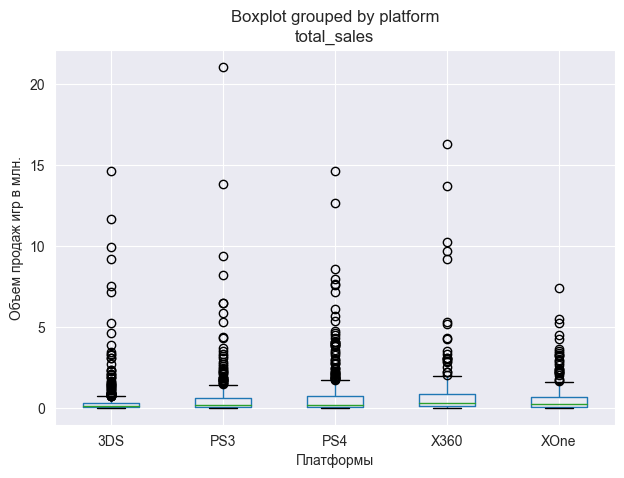

In [37]:
df_relevant.boxplot(column=['total_sales' ], by = ['platform'], figsize=(7, 5))
plt.ylim()
plt.xlabel('Платформы')
plt.ylabel('Объем продаж игр в млн.')
plt.show()

Как видим из построенных boxplot-графиков, разброс данных достаточно существенный - от ≈0 до ≈22 млн. Однако большое сколпление данных сосредоточено в диапазоне от 0 до 5 млн. Зададим соответсвующих масштаб для boxplot-графиков.

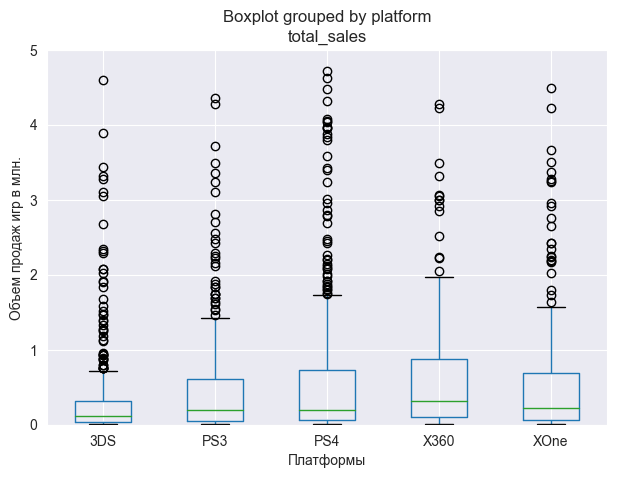

In [38]:
df_relevant.boxplot(column=['total_sales' ], by = ['platform'], figsize=(7, 5))
plt.ylim(0,5)
plt.xlabel('Платформы')
plt.ylabel('Объем продаж игр в млн.')
plt.show()

Дополнительно рассмотрим "ящики с усами" в дипазоне значений от 0 до 2 млн.

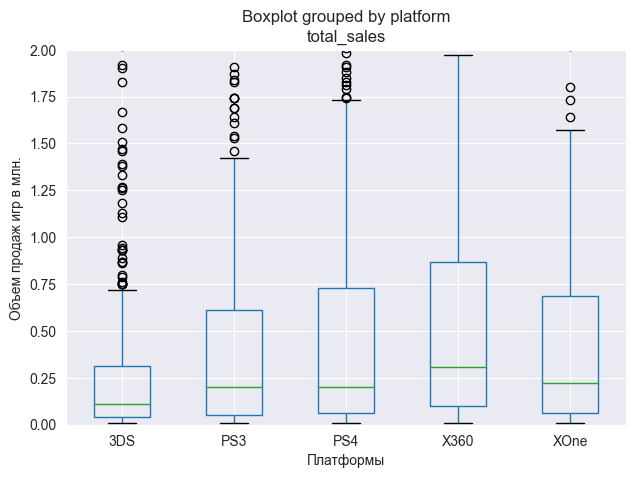

In [39]:
df_relevant.boxplot(column=['total_sales' ], by = ['platform'], figsize=(7, 5))
plt.ylim(0,2)
plt.xlabel('Платформы')
plt.ylabel('Объем продаж игр в млн.')
plt.show()

Исходя из полученных графиков можно утверждать:
* **длина усов** - по длине усы ящиков не равнозначны: по четырем платформам - PS3, PS4, X360, xone, верхняя граница находится в диапазоне от 1.5 до 1.75; диапазон разброса значений у платформ компании Nintendo - 3DS и Wii существенно меньше - верзняя граница расположена в диапазоне от 0.75 до 1 млн. 
* **медиана** - медианные значения по платформам не равнозначны. Самое высокое медианное значение на платформе X360, самое низкое на 3DS
* **скошенность наборов данных** - на всех графиках наблюдается скошенность данных вверх. Это означает, что выше медианы имеется достаточно большое количество значений, что свидетельствует о потенциальных возможностях роста продаж при создании соответсвующих условий.

Резюмируя итоги анализа boxplot-графиков, можно сделать вывод о том, что потенциально прибыль могут принести продажи контента по четырем наиболее востребованным платформам:
* Pastgen - PS3, X360;
* Nextgen - PS4, XOne.

Исключим из списка актуальных платформ консоли комании Nintendo - диапзоны нормального распредления значений существенно уступают другим платформам. Предположительно, контент для данных платформ будет менее востребован и не будет способен обеспечить стабильный доход от продаж.

In [40]:
df_relevant = df_relevant.query('["PS4", "PS3","XOne", "X360"] in platform').reset_index(drop=True)

**Анализ зависимости продаж от оценок**

На основе выделенных данных, изучим зависимость продаж от оценок критиков.

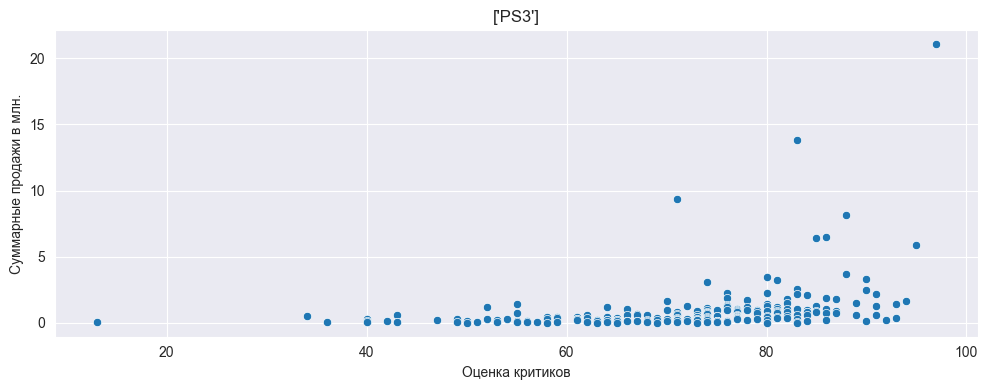

Корреляция данных:


,total_sales,critic_score
total_sales,1.00,0.33
critic_score,0.33,1.00


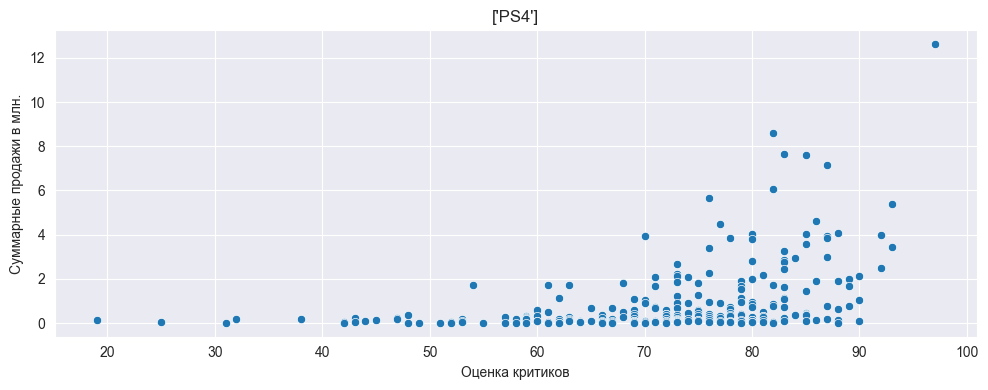

Корреляция данных:


,total_sales,critic_score
total_sales,1.00,0.41
critic_score,0.41,1.00


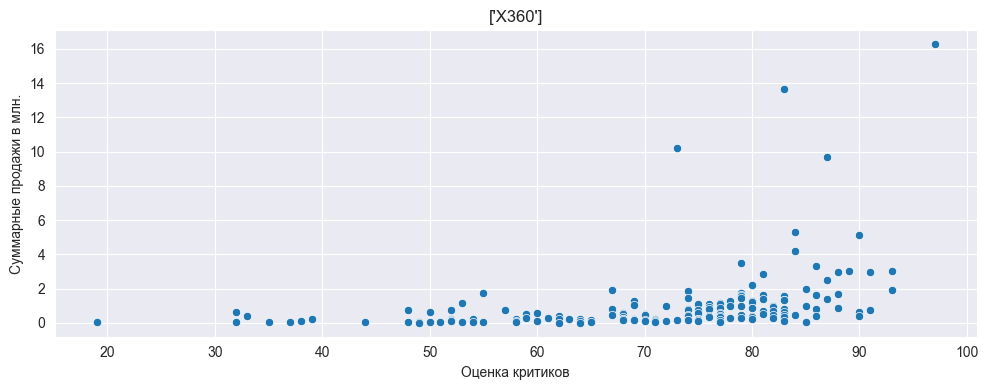

Корреляция данных:


,total_sales,critic_score
total_sales,1.00,0.36
critic_score,0.36,1.00


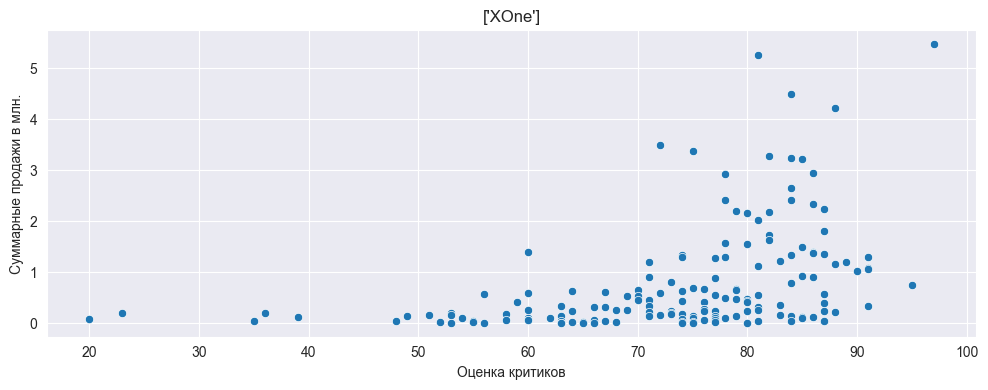

Корреляция данных:


,total_sales,critic_score
total_sales,1.00,0.41
critic_score,0.41,1.00


In [41]:
# формирование сводых таблиц по платформам
ps3 = df_relevant.query('platform == "PS3" and critic_score!=-1 and user_score!=-1')
ps4 = df_relevant.query('platform == "PS4" and critic_score!=-1 and user_score!=-1')
x360 = df_relevant.query('platform == "X360" and critic_score!=-1 and user_score!=-1')
xone = df_relevant.query('platform == "XOne" and critic_score!=-1 and user_score!=-1')

# функция для построения диаграмм рассеяния и расчета корреляции данных продаж от оценки критиков
def scater(query):
    plt.figure(figsize=(10, 4))
    sns.scatterplot(x='critic_score', y='total_sales', data=query)
    plt.title(query['platform'].unique())
    plt.ylabel('Суммарные продажи в млн.')
    plt.xlabel('Оценка критиков')
    plt.tight_layout()
    plt.show()
    print('Корреляция данных:')
    display(query[['total_sales', 'critic_score']].corr())
    
# применение функции к сводным таблицам
scater(ps3)
scater(ps4)
scater(x360)
scater(xone)

Исследуем зависимость продаж от оценок пользователей

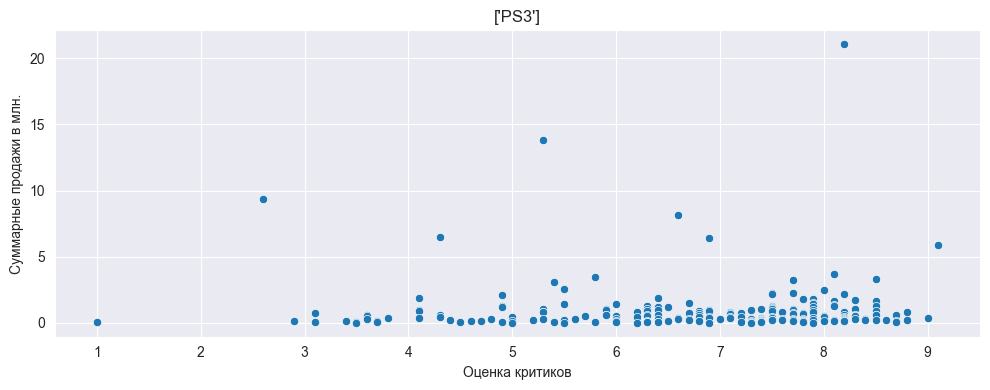

Корреляция данных:


,total_sales,user_score
total_sales,1.00,0.00
user_score,0.00,1.00


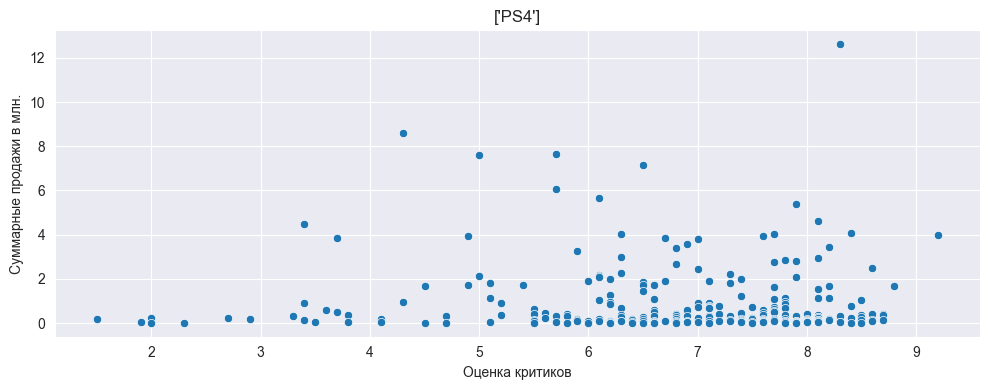

Корреляция данных:


,total_sales,user_score
total_sales,1.00,-0.03
user_score,-0.03,1.00


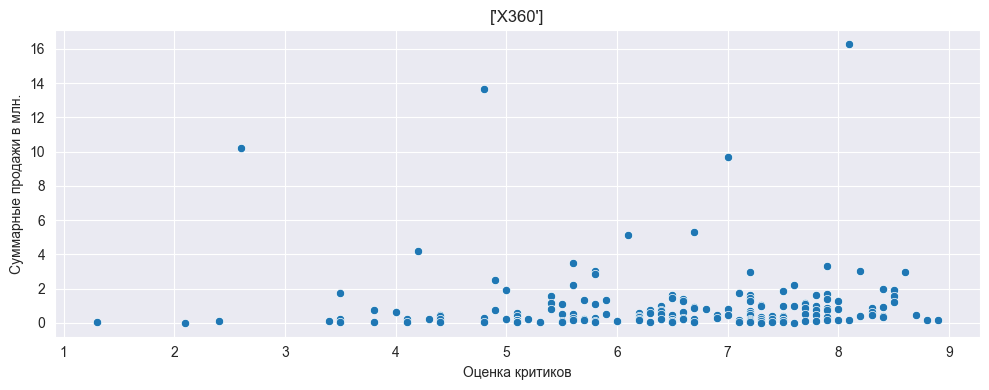

Корреляция данных:


,total_sales,user_score
total_sales,1.00,-0.00
user_score,-0.00,1.00


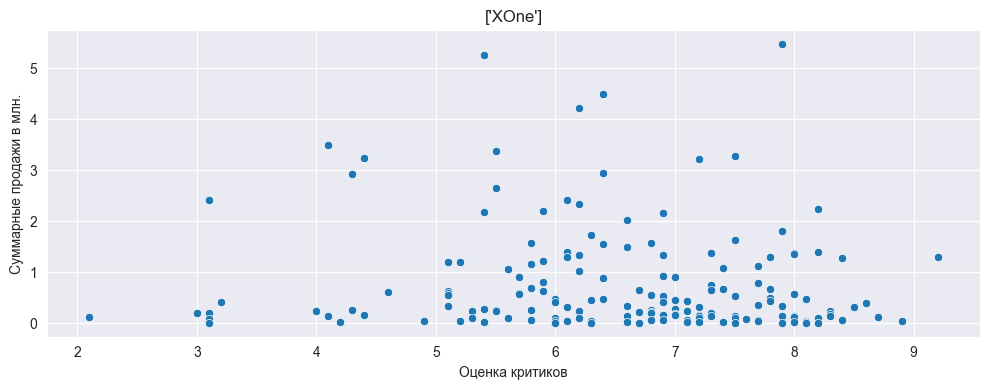

Корреляция данных:


,total_sales,user_score
total_sales,1.00,-0.09
user_score,-0.09,1.00


In [42]:
# функция для построения диаграмм рассеяния и расчета корреляции данных продаж от оценки пользователей
def scater(query):
    plt.figure(figsize=(10,4))
    sns.scatterplot(x='user_score', y='total_sales', data=query)
    plt.title(query['platform'].unique())
    plt.ylabel('Суммарные продажи в млн.')
    plt.xlabel('Оценка критиков')
    plt.tight_layout()
    plt.show()
    print('Корреляция данных:')
    display(query[['total_sales', 'user_score']].corr())

# применение функции сводным таблицам
scater(ps3)
scater(ps4)
scater(x360)
scater(xone)

Исходя из полученных данных диаграмм можно судить о том, что:
* существует общий тренд роста продаж контента в зависимости от оценки критиков - активней продается контент, имещий оценку не менее 80 баллов;
* линейной зависимости роста продаж контента от оценок пользователей не выявлено. Высокие продажи может иметь контент имеющий как низкие оценки пользователей, так и высокие.

Анализируя показатели корреляции данных установлено:
* существует выраженная положительная корреляция данных продаж от оценок критиков. Иными словами, конент, имещий высокие продажи имеет высокую оценку критиков, и наоборот, контент имеющий высокие оценки критиков будет более востребован у потребителя и обеспечит высокие продажи
* корреляционная связь между оценкой пользователей и продажами контента несущественная. Оценки пользователей практически не влияют на продажи контента.

Проверим наши выводы, построим аналогичные диаграммы рассеяния для полного датафрейма и расчетаем корреляцию для суммарных продаж по всем платформам и оценок критиков и пользователей. 

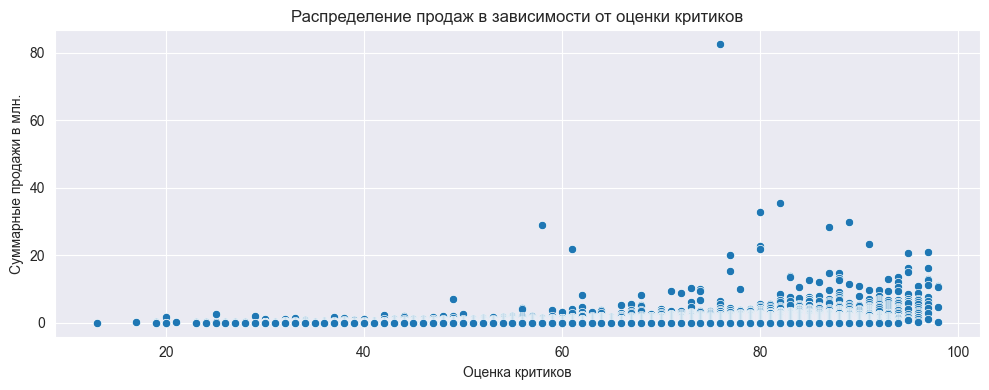

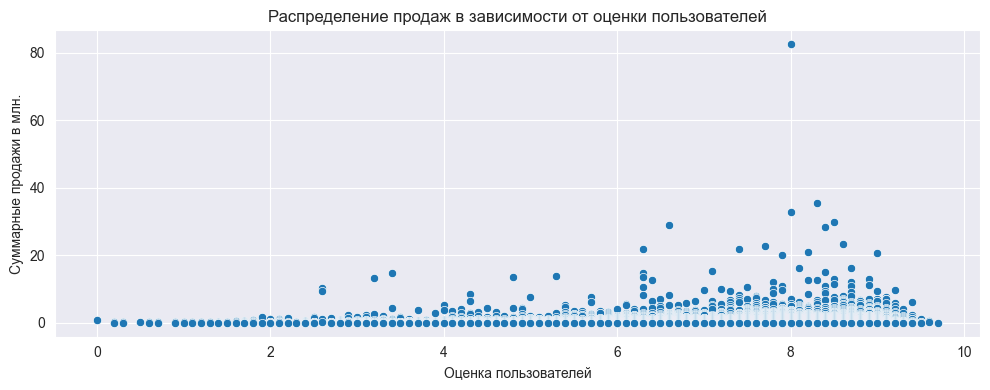

Корреляция данных:


,total_sales,critic_score,user_score
total_sales,1.00,0.15,0.13
critic_score,0.15,1.00,0.82
user_score,0.13,0.82,1.00


In [43]:
x_critic = df.query('critic_score!=-1')
x_user = df.query('user_score!=-1')

# построение диаграммы рассеяния для параметров 'critic_score' и'total_sales'
plt.figure(figsize=(10,4))
sns.scatterplot(x='critic_score', y='total_sales', data=x_critic)
plt.title('Распределение продаж в зависимости от оценки критиков')
plt.ylabel('Суммарные продажи в млн.')
plt.xlabel('Оценка критиков')
plt.tight_layout()
plt.show()

# построение диаграммы рассеяния для параметров 'user_score' и'total_sales'
plt.figure(figsize=(10,4))
sns.scatterplot(x='user_score', y='total_sales', data=x_user)
plt.title('Распределение продаж в зависимости от оценки пользователей')
plt.ylabel('Суммарные продажи в млн.')
plt.xlabel('Оценка пользователей')
plt.tight_layout()
plt.show()

# рассчет корреляции параметров 'total_sales' и 'critic_score'/'user_score'
print('Корреляция данных:')
display(df[['total_sales', 'critic_score', 'user_score']].corr())

Резюмируя наблюдения, можно установить еще один параметр, определяющий уровень продаж контента - для обеспечения высокго уровня продаж контент для платформ PS3, X360, PS4 и XOne должен иметь оценку критиков не менее 80 баллов

**Исследовательский анализ жанров контента для актуальных платформ**

Посмотрим на общее распределение игр по жанрам

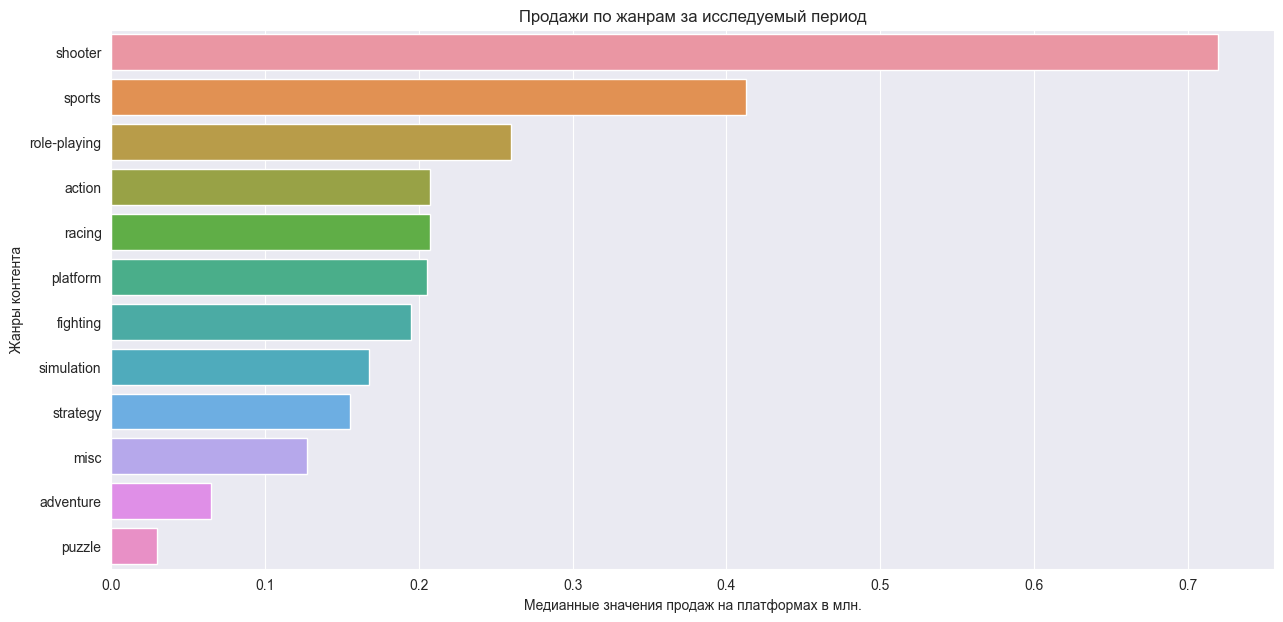

genre,shooter,sports,role-playing,action,racing,platform,fighting,simulation,strategy,misc,adventure,puzzle
platform,,,,,,,,,,,,
PS3,0.39,0.36,0.16,0.26,0.17,0.25,0.19,0.12,0.14,0.07,0.05,0.04
PS4,0.97,0.53,0.20,0.15,0.23,0.30,0.17,0.21,0.08,0.07,0.07,0.02
X360,0.47,0.46,0.49,0.33,0.23,0.11,0.23,0.18,0.45,0.27,0.07,NaN
XOne,1.10,0.33,0.32,0.15,0.18,0.16,0.20,0.16,0.17,0.18,0.06,NaN
median,0.72,0.41,0.26,0.21,0.21,0.21,0.20,0.17,0.15,0.13,0.07,0.03


In [44]:
# формирование сводной таблицы по суммарным продажам игр в делении по жанрам за весь изучаемый период
genre_on_sales = df_relevant.pivot_table(index='genre', columns='platform', values='total_sales', aggfunc='median')
genre_on_sales['median'] = genre_on_sales.median(axis=1)
genre_on_sales = genre_on_sales.sort_values(by='median', ascending=False)

# построение графика суммарных продаж по жанрам
plt.figure(figsize=(15,7))
sns.barplot(x=genre_on_sales['median'] ,y=genre_on_sales.index)
plt.title('Продажи по жанрам за исследуемый период')
plt.xlabel('Медианные значения продаж на платформах в млн.')
plt.ylabel('Жанры контента')
plt.show()

display(genre_on_sales.T)

Наиболее продаваемым жанром не зависимо от платформы является жанр:
* shooter

Почти в двое по популярности жанру `shooter` уступает жанр:
* sports

На треть жанру `sports` уступает жанр:
* role-playing

Следующие за жанром `role-playing` жанры имеют практически одинаковые продажи:
* action	
* racing
* platform
* fighting

Наименьший интерес у пользователей в отношении таких жанров как:
* misc
* adventure
* puzzle

Безусловно, низкий уровень продаж по данным жанрам обусловлен их "нишевостью". 

## Формирование портрета пользователя для каждого региона

Для формирования актуального портрета пользователя по регионам возьмем данные за актуальный период, начиная с 2012 года.

Для работы будем использовать сформированный ранее датафрейм `df_actual_year`

**Топ-5 платформ по регионам**

C:\Users\Dergilev AV\AppData\Local\Temp\ipykernel_13152\4192696765.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top = top.append(row_other, ignore_index=True).set_index(column)
C:\Users\Dergilev AV\AppData\Local\Temp\ipykernel_13152\4192696765.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top = top.append(row_other, ignore_index=True).set_index(column)
C:\Users\Dergilev AV\AppData\Local\Temp\ipykernel_13152\4192696765.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top = top.append(row_other, ignore_index=True).set_index(column)
C:\Users\Dergilev AV\AppData\Local\Temp\ipykernel_13152\4192696765.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

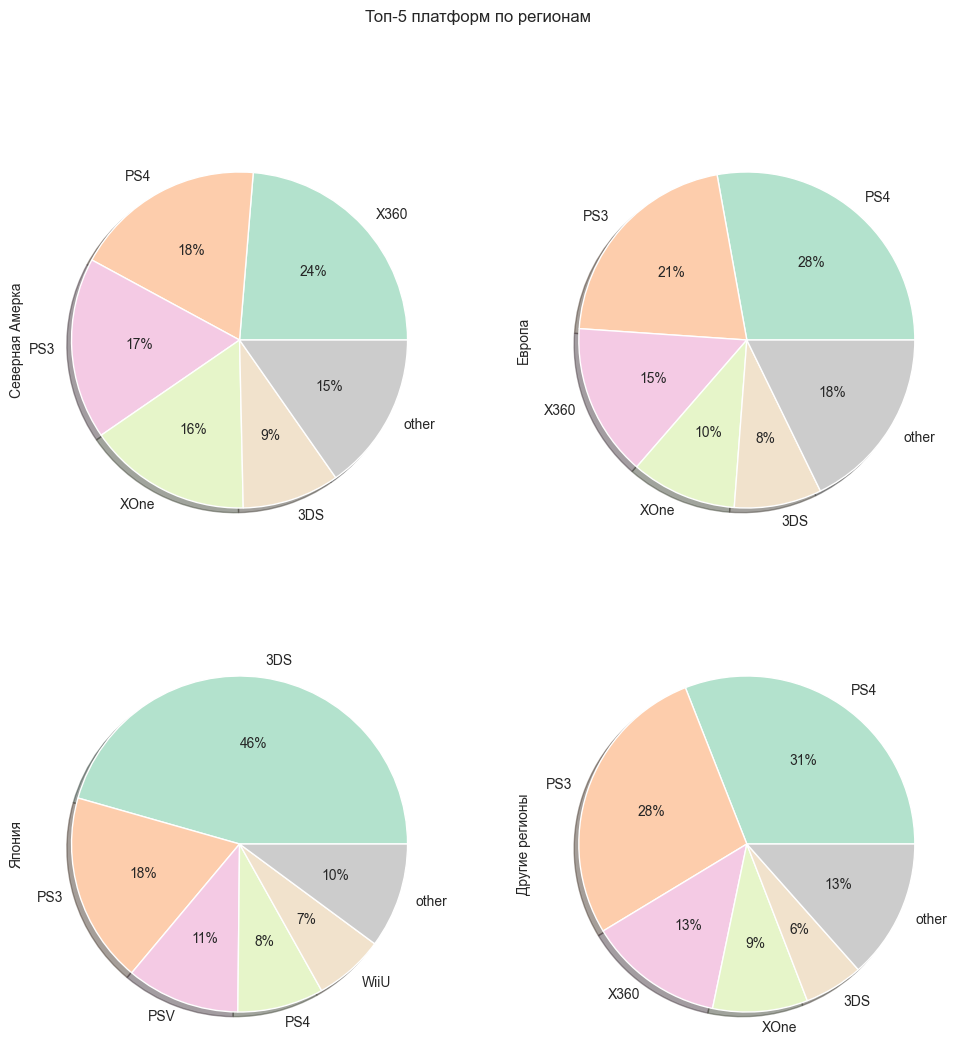

In [45]:
def region_top5(column, region, ax1,ax2):
    pivot = (df_actual_year.pivot_table(index=column, values=region, aggfunc='sum')
             .sort_values(region, ascending=False))
    top = pivot.apply(lambda x: x.iloc[:5]).reset_index()
    non_top = pivot.apply(lambda x: x.iloc[5:]).reset_index()
    sum_other = non_top[region].sum()
    row_other = {column:'other',region:sum_other}
    top = top.append(row_other, ignore_index=True).set_index(column)
    label_dict = {'na_sales':'Северная Амерка', 'eu_sales':'Европа',
                        'jp_sales':'Япония', 'other_sales':'Другие регионы'}
    plot = top.plot.pie(subplots=True, autopct='%1.0f%%',
                        legend=False, title=('Топ-5 платформ по регионам'), 
                        ylabel=label_dict[region],  shadow=True,
                        ax=axes[ax1,ax2], cmap='Pastel2')

fig, axes = plt.subplots(2,2, figsize=(12,12))

region_top5('platform', 'na_sales', 0,0)
region_top5('platform', 'eu_sales', 0,1)
region_top5('platform', 'jp_sales', 1,0)
region_top5('platform', 'other_sales', 1,1)

Исходя из представленных диаграмм, можно говорить о том, что:
* в Северной Америке большую часть рынка занимает контент для платформ PS3, X360
* в Европе и дургих регионах также актуальны платформы PS3, X360. Однако, в данных регионах, к числу востребованных добавляется PS4
* Япония отличается топом-5 платформ от других регионов - наибольшую популярность имеют платформы компаний Nintendo и Sony, в то время как платформы западных корпораций отсутствует в числе востребованных

**Топ-5 жанров по регионам**

C:\Users\Dergilev AV\AppData\Local\Temp\ipykernel_13152\1701768430.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top = top.append(row_other, ignore_index=True).set_index(column)
C:\Users\Dergilev AV\AppData\Local\Temp\ipykernel_13152\1701768430.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top = top.append(row_other, ignore_index=True).set_index(column)
C:\Users\Dergilev AV\AppData\Local\Temp\ipykernel_13152\1701768430.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top = top.append(row_other, ignore_index=True).set_index(column)
C:\Users\Dergilev AV\AppData\Local\Temp\ipykernel_13152\1701768430.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

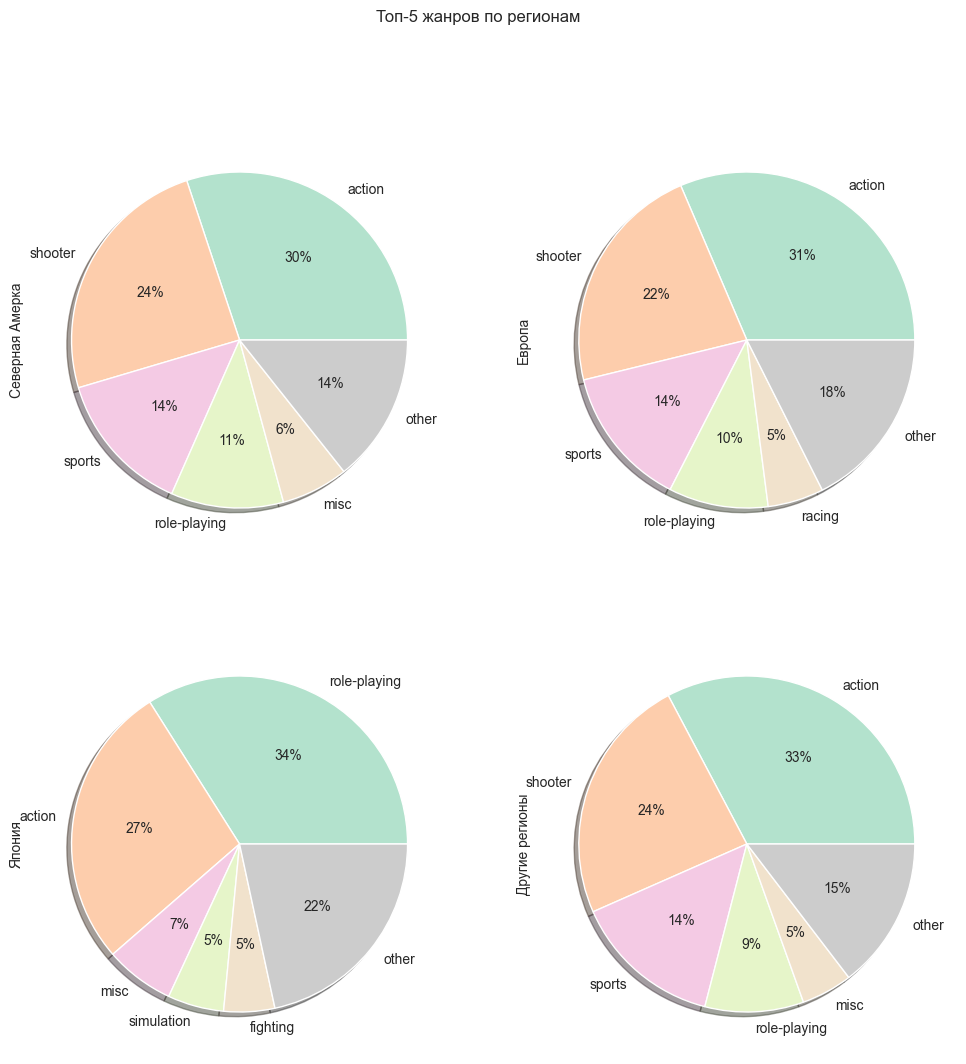

In [46]:
def region_top5(column, region, ax1,ax2):
    pivot = (df_actual_year.pivot_table(index=column, values=region, aggfunc='sum')
             .sort_values(region, ascending=False))
    top = pivot.apply(lambda x: x.iloc[:5]).reset_index()
    non_top = pivot.apply(lambda x: x.iloc[5:]).reset_index()
    sum_other = non_top[region].sum()
    row_other = {column:'other',region:sum_other}
    top = top.append(row_other, ignore_index=True).set_index(column)
    label_dict = {'na_sales':'Северная Амерка', 'eu_sales':'Европа',
                        'jp_sales':'Япония', 'other_sales':'Другие регионы'}
    plot = top.plot.pie(subplots=True, autopct='%1.0f%%',
                        legend=False, title=('Топ-5 жанров по регионам'), 
                        ylabel=label_dict[region], shadow=True,
                        ax=axes[ax1,ax2], cmap='Pastel2')

fig, axes = plt.subplots(2,2, figsize=(12,12))

region_top5('genre', 'na_sales', 0,0)
region_top5('genre', 'eu_sales', 0,1)
region_top5('genre', 'jp_sales', 1,0)
region_top5('genre', 'other_sales', 1,1)

Жанровые предпочтения пользователей из Северной Америки и Европы очень похожи. Почти с одинаковым процентным соотношением в топ-5 в этих регионах попали жанры: action, shooter, sports, role-playing, misc

Выборка регионов по которым производился расчет продаж `other_sales` имеет аналогичные Европе и Северной Америке жанровые предпочтения

Пользователи из Японии предпочитают жанр role-playing, который занимает практически 45% от всего топа. Однако, учитывая любовь японцев к японским консолям, можно предположить, что в большей степени жанр role-playing представлен JRPG, практически исключая западный контент.  Кроме этого, пользователей из Японии от пользователей из других регионов отличает любовь к жанрам platform и adventure.

**ESRB рейтинг контента по регионам**

Для каждого из приведенных в исследовании регионов существует своя система рейтингования игр:

**PEGI (Pan European Game Information)** -  европейская система рейтингования компьютерных игр и другого развлекательного программного обеспечения;

**CERO (Computer Entertainment Rating Organization)** - японская некоммерческая организация, занимающаяся присуждением рейтингов компьютерным играм и программному обеспечению для их последующей продажи на территории Японии

**ESRB (Entertainment Software Rating Board)** - негосударственная организация, определяющая рейтинги для компьютерных видеоигр и другого развлекательного программного обеспечения на территроии США и Канады.

В нашем исследовании имеются данные о продажах игр, имеющих рейтинг ESRB, что указывает на то, что контент изначально был предназначен для внутреннего рынка на территории США и Канады.

Ознакомимся с распределением игр по рейтингам за актуальный период времени по регионам.

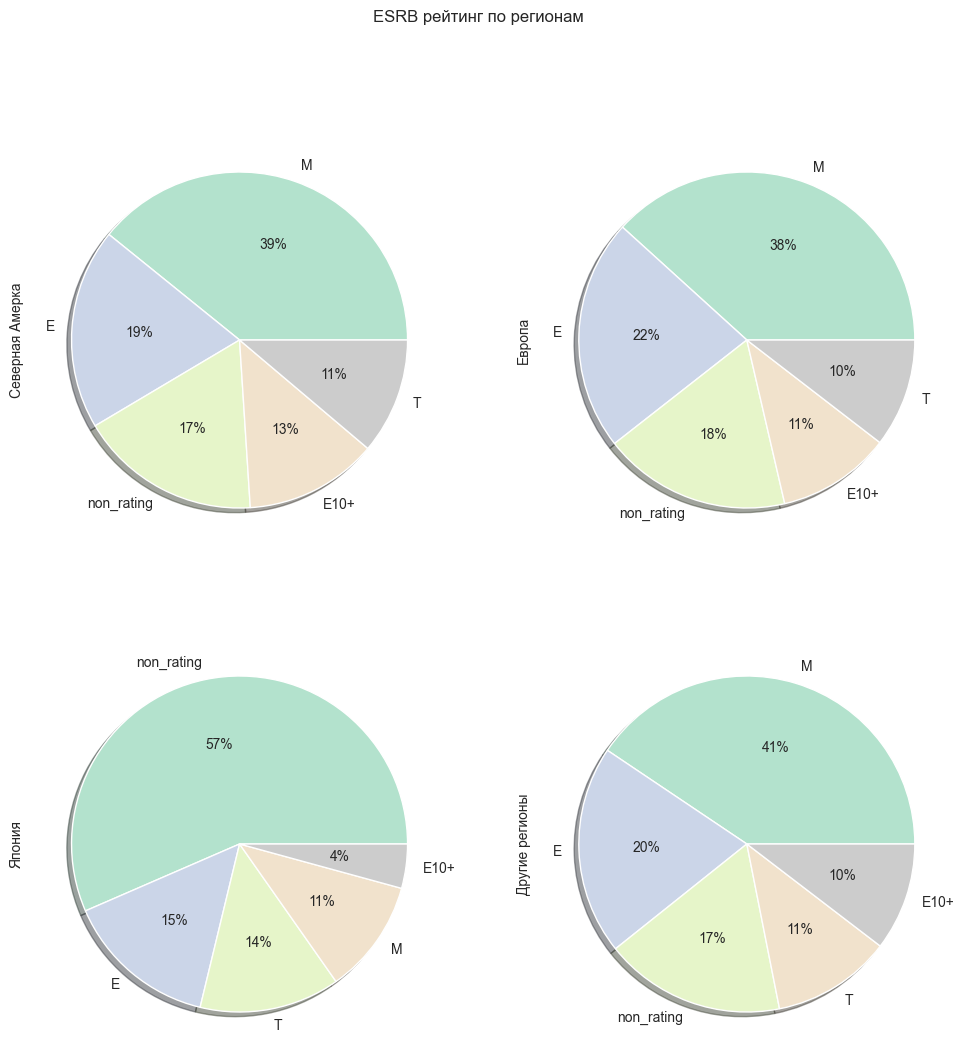

In [47]:
def region_top5(column, region, ax1,ax2):
    pivot = (df_actual_year.pivot_table(index=column, values=region, aggfunc='sum')
             .sort_values(region, ascending=False))
    label_dict = {'na_sales':'Северная Амерка', 'eu_sales':'Европа',
                        'jp_sales':'Япония', 'other_sales':'Другие регионы'}
    plot = pivot.plot.pie(subplots=True, autopct='%1.0f%%',
                        legend=False, title=('ESRB рейтинг по регионам'), 
                        ylabel=label_dict[region], shadow=True,
                        ax=axes[ax1,ax2], cmap='Pastel2')

fig, axes = plt.subplots(2,2, figsize=(12,12))

region_top5('rating', 'na_sales', 0,0)
region_top5('rating', 'eu_sales', 0,1)
region_top5('rating', 'jp_sales', 1,0)
region_top5('rating', 'other_sales', 1,1)

Необходимо отметить определенную схожесть трех диаграмм - Северная Америка, Европа и Другие регионы. Доли контента по рейтингам примерно равны (разница 1-3%). Это может указывать на то, что в этих регионах реализуется контент выпущенный на территории Северной Америки и прошедший соответсвующую процедуру рейтингования.

Рынок Японии явно отличается от других - 57% игр не имеют рейтинг ESRB, что свидетельствует о том, что большая часть игр произведена не на территории Северной Америки. Учитывая, что Япония занимает лидирующие позиции в игровой индустрии, можно говорить о том, что большая часть рынка представлена отечественными японскими играми.

## Проверка гипотез исследования

Проведем статистическую проверку выдвинутых в данном исследовании гиптез. Для проверки гипотез будем использовать данные за актуальный период - начиная с 2013 года.

Зададим пороговое значение alpha равное 0.05

In [49]:
# критическое значение для статистического теста
alpha = 0.05

Поскольку для проверки будем использовать scipy.stats.ttest_ind - тест на проверку гипотез о равенстве средних значений двух независимых выборок, необходимо убедиться, что выборки имеют примерно одинаковые дисперсии.

Для оценки равенства дисперсии между двумя разными выборками воспользуемя scipy.stats.levene - тестом Левена. Для каждого случая он вычислит абсолютную разницу между значением этого случая и его средним значением по ячейке и выполнит односторонний дисперсионный анализ (ANOVA) этих различий. Тест Левена проверяет нулевую гипотезу о том, что все входные выборки взяты из совокупностей с одинаковыми дисперсиями (p-value>alpha). 

Исходя из полученных значений p-value определим значение equal_var для каждого теста scipy.stats.ttest_ind.

**Гипотезы по среднему пользовательскому рейтингу игровых платформ:**

`Нулевая гипотеза:` средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

`Альтернативная гипотеза:` средние пользовательские рейтинги платформ Xbox One и PC разные;

In [50]:
# формирование сводной таблицы с медианными значениями среднего пользовательских оценок по каждой платформе
# срез данных по платформам XOne и PC
platform_mean = (df_actual_year.pivot_table(index='platform', values='user_score', aggfunc='mean')
                 .query('platform == ["XOne", "PC"]').reset_index(0))

# формирование срезов данных по платформам XOne и PC
xone_query = df_actual_year[df_actual_year['platform'] == 'XOne']['user_score'].dropna()
pc_query = df_actual_year[df_actual_year['platform'] == 'PC']['user_score'].dropna()

In [51]:
# тест Левена на проверку равенства дисперсий выборок
stat, p_value = levene(xone_query, pc_query, center = 'mean')
print('p-значение:', p_value)
        
if p_value > alpha :
    print ('Не получилось отвергнуть нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

p-значение: 0.006555853906446315
Отвергаем нулевую гипотезу


Для статистического теста на проверку равенства средних двух выборок зададим значение `equal_var=False`

In [52]:
results = st.ttest_ind(xone_query, pc_query, equal_var = False)

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

print('\n')
print('Cредние пользовательские рейтинги платформ:')
display(platform_mean)

p-значение: 0.05619765758385681
Не получилось отвергнуть нулевую гипотезу


Cредние пользовательские рейтинги платформ:


,platform,user_score
0,PC,5.12
1,XOne,4.54


**Результат:** Принимаем нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Гипотезы по среднему пользовательскому рейтингу игровых жанров:**

`Нулевая гипотеза:` средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые;

`Альтернативная гипотеза:` средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные;

In [53]:
# формирование сводной таблицы с медианными значениями среднего пользовательских оценок по каждому жанру
# срез данных по жанрам action и sports
genre_mean = (df_actual_year.pivot_table(index='genre', values='user_score', aggfunc='mean')
                 .query('genre == ["action", "sports"]').reset_index(0))

# формирование срезов данных по жанрам action и sports
action_query = df_actual_year[df_actual_year['genre'] == 'action']['user_score'].dropna()
sports_query = df_actual_year[df_actual_year['genre'] == 'sports']['user_score'].dropna()

In [54]:
action_query

16       8.20
23       8.10
42       8.30
81       6.60
127      6.90
         ... 
16408   -1.00
16419   -1.00
16420    7.60
16427   -1.00
16437   -1.00
Name: user_score, Length: 1031, dtype: float64

In [55]:
# тест Левена на проверку равенства дисперсий выборок
stat, p_value = levene(action_query, sports_query, center = 'mean')
print('p-значение:', p_value)

if p_value > alpha :
    print ('Не получилось отвергнуть нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

p-значение: 7.159989957232035e-44
Отвергаем нулевую гипотезу


Для статистического теста на проверку равенства средних двух выборок зададим значение `equal_var=False`

In [56]:
results = st.ttest_ind(action_query, sports_query, equal_var = False)

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

print('\n')
print('Cредние пользовательские рейтинги жанров:')
display(genre_mean)

p-значение: 0.002001820955932471
Отвергаем нулевую гипотезу


Cредние пользовательские рейтинги жанров:


,genre,user_score
0,action,2.97
1,sports,3.70


**Результат:** Отвергаем гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые, в пользу `альтернативной гипотезы`.

## Общий вывод по результатам исследования

Напомним, что основной целью исследования является определение закономерностей и параметров, определюящих успешность игры, что в конечном счете, позволило бы определять потенциально популярный продукт.

В ходе иссследования были определены ключевые параметры, которые необходимо учитывать при выборе потенциально прибыльного контента. Перечислим их.

**Актуальный период** Наиболее абстрактный и широкий параметр - во многом актуальный период определяется текщими тенденциями в игровой индустрии. Сложно утверждать какой период принимать за актуальный - это может быть период в 5-6 лет, так и в 2-3 года. Однако, рекомендуем принимать за актуальный, период не более 4 лет. 

**Актуальные платформы** При определении актуальных платформ нельзя исходить из общего уровня продаж на тех или иных платформах на текущий момент времени. Необходимо учитывать, что игровая индустрия одна из наиболее быстро развивающихся сфер, и крайне динамична - на смену одним поколениям платформ приходят новые, что ведет к изменениям тенденций при реализации контента. В среднем, жизненный цикл консоли составляет 10 лет - от подьема продаж на платформе до падения таковых. В ходе исследования, было определено, что высокий уровень продаж обеспечивается на протяжении 3-4 лет, начиная со 2-3 года жизненного цикла консоли и подходит к концу к 6-7 году цикла.

**Продажи на платформах** В актуальный период высокий урвень спроса может обеспечить контент как для новых платформ, так и для старых поколений - имеющиеся тайтлы на старых платформах уже востребованы у пользователей, а потому потенциально могут представлять интерес.

**Оценка контента** В большей степени на уровень продаж влияют оценки критиков - контент получивший от 70 баллов от критиков имеет более высокий уровень продаж. Оценки пользователей не влияют на спрос на контент.

**Жанр игр** Наиболее востребованными среди пользователей являются игры в жанрах: action, shooter, sports, role-playing.

**Регион** Глобально разница в рынках существует между Японией и остальным миром. Пользователи из Японии отличаются более специфичными вкусами от пользователей из других регионов.

**Возрастной рейтинг** Во всем мире практически 40% пользователей приобретают контент, предназначенный для взрослых. Косвенно, это может говорить о том, что существует большой спрос на игровой контент среди взрослого населения.

Если говорить о прогнозе на `2017 год`, можно конкретизировать перечисленные параметры следующим образом:

**Актуальный период** Рекомендуем принимать за актуальный, период в 4 года.

**Актуальные платформы** Потенциально прибыль могут принести продажи контента по двум наиболее востребованным платформам: PS4, XOne.

**Оценка контента** Стоит выбирать контент с оценками критиков от 80 баллов.

**Жанр игр** Стабильные продажи имеют игры жанров: shooter, sports, role-playing

**Рейтинг ESRB** Большая часть игр продаваемых на территории Европы имеет рейтинг `M` - контент для взрослых. Стоит сосредоточить внимание на рекламе игр имеющих данный рейтинг в совокупности с другими параметрами. 

В ходе проверок гипотез исследования:
* Была принята нулевая гипотеза о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.
* Была отвергнута гипотеза о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые, в пользу альтернативной гипотезы о том, что средние пользовательские рейтинги этих жанров будут разные